In [16]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="darkgrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

dtypes = {'id': 'int32', 
'titulo': 'object', 
'descripcion': 'object', 
'tipodepropiedad': 'category', 
'direccion': 'object', 
'ciudad': 'object', 
'provincia': 'category', 
'antiguedad': 'float16', 
'habitaciones': 'float16', 
'garages': 'float16', 
'banos': 'float16', 
'metroscubiertos': 'float16', 
'metrostotales': 'float16', 
'idzona': 'object', 
'lat': 'float64', 
'lng': 'float64', 
'gimnasio': 'float16', 
'usosmultiples': 'float16', 
'piscina': 'float16', 
'escuelascercanas': 'float16', 
'centroscomercialescercanos': 'float16', 
'precio': 'float32', }
#parse_dates = ['fecha'] CONSUME MAS MEMORIA QUE EL TIPO OBJECT. Conviene convertirlo luego de subido el csv.


train = pd.read_csv('C:/Users/Alan Camussi/Desktop/train.csv', dtype = dtypes, low_memory=False, error_bad_lines = False)


### Chequeo si hay columnas con valores nulos

In [3]:
train.isnull().any()

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool

In [4]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(train), 2)
nulls

,nulls,porcentaje
id,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
precio,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06


## Análisis cantidad de propiedades por provincia

In [88]:
train.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

Text(0.5, 1.0, 'Cantidad de propiedades por provincia')

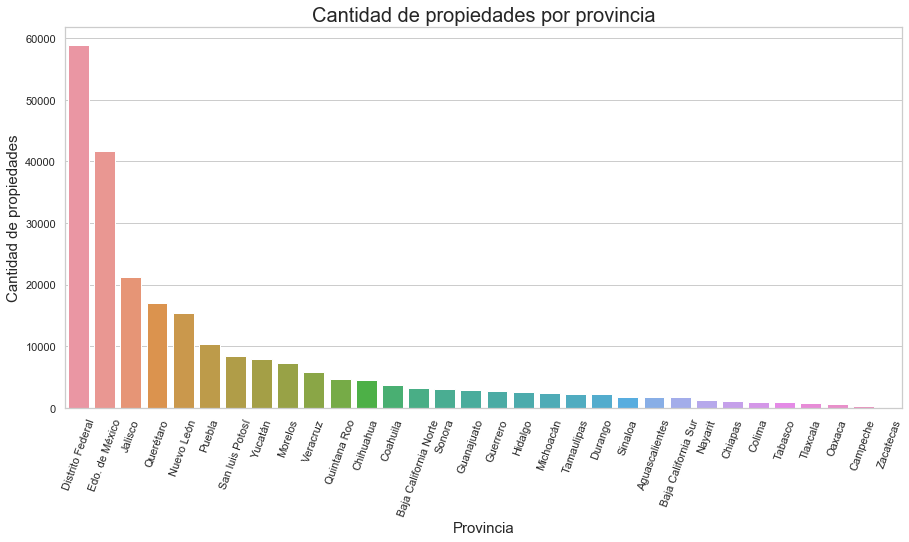

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train, order=train['provincia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades por provincia", fontsize=20)

## Análisis precio promedio por provincia

In [57]:
# Muestra cada provincia con su correspondiente promedio de precio ordenados de mayor a menor
train_precio_prov = train_prov[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_precio_prov = train_precio_prov.rename(columns={'precio':'precio_promedio'})
train_precio_prov['precio_promedio_usd'] = train_precio_prov['precio_promedio'] * 0.051
train_precio_prov


,provincia,precio_promedio,precio_promedio_usd
8,Distrito Federal,"3,471,705.00","177,056.95"
10,Edo. de México,"2,762,465.00","140,885.72"
18,Nuevo León,"2,717,757.75","138,605.64"
12,Guerrero,"2,548,741.75","129,985.83"
22,Quintana Roo,"2,402,967.00","122,551.31"
14,Jalisco,"2,367,693.50","120,752.37"
26,Tabasco,"2,300,480.25","117,324.49"
20,Puebla,"2,298,403.75","117,218.59"
16,Morelos,"2,290,088.00","116,794.48"
21,Querétaro,"2,144,109.00","109,349.55"


Text(0, 0.5, 'Nombre de la provincia')

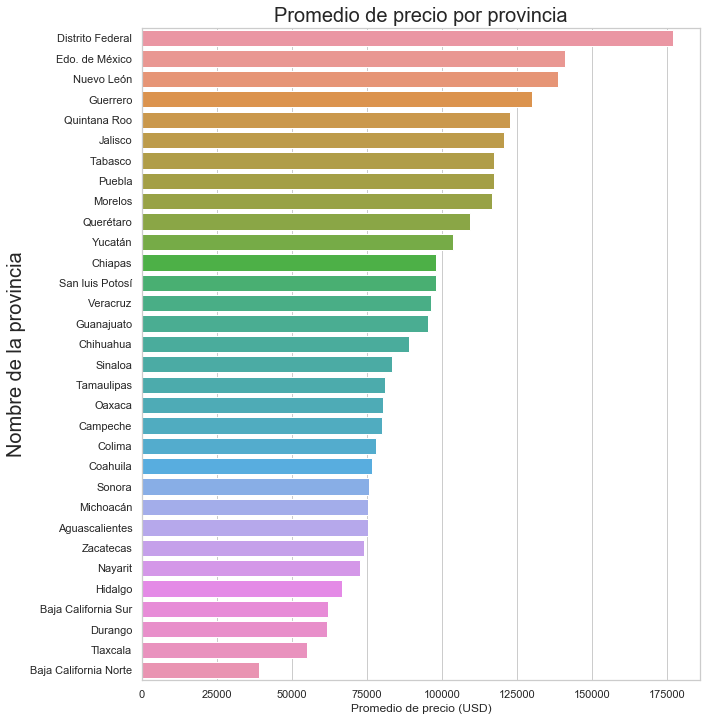

In [85]:
#Grafico de promedio de precio por provincia
plt.rcParams['figure.figsize'] = (10, 12)
g = sns.barplot(x= train_precio_prov['precio_promedio_usd'], y=train_prop_prov['provincia'], orient='h', order = train_precio_prov.iloc[:, 0])
g.set_title("Promedio de precio por provincia", fontsize=20)
g.set_xlabel("Promedio de precio (USD)", fontsize=12)
g.set_ylabel("Nombre de la provincia", fontsize=20)


## Análisis cantidad de propiedades por tipo de propiedad

In [58]:
train['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades por tipo')

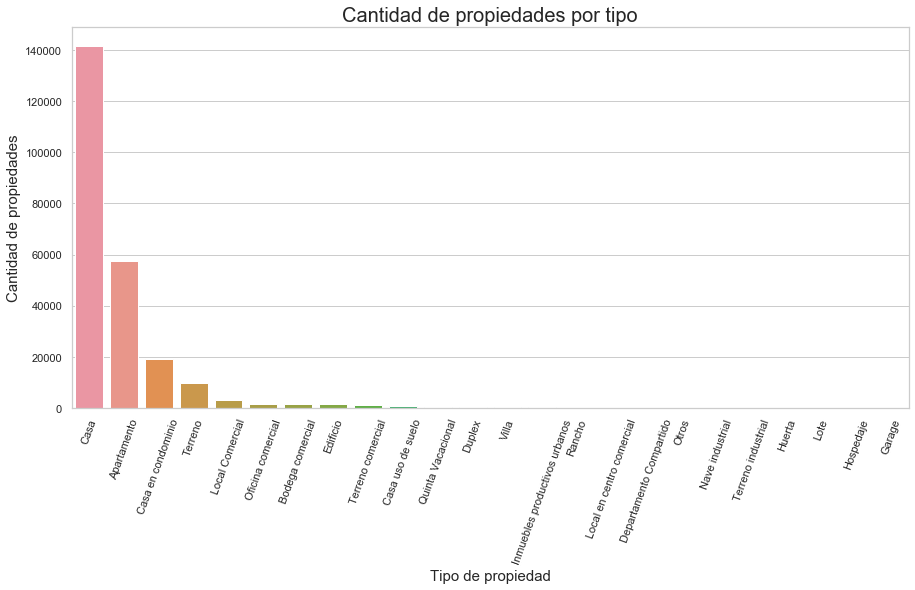

In [60]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train, order=train['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades por tipo", fontsize=20)

## Análisis precio promedio de cada tipo de propiedad

In [61]:
train_tipoprop_precio = train.groupby('tipodepropiedad').agg({'precio':'mean'})
train_tipoprop_precio = train_tipoprop_precio.reset_index()
train_tipoprop_precio = train_tipoprop_precio[['tipodepropiedad', 'precio']].sort_values(by='precio', ascending=False)
train_tipoprop_precio = train_tipoprop_precio.rename(columns={'precio':'precio_promedio'})
train_tipoprop_precio['precio_promedio_usd'] = train_tipoprop_precio['precio_promedio'] * 0.051
train_tipoprop_precio

,tipodepropiedad,precio_promedio,precio_promedio_usd
7,Edificio,"5,009,499.50","255,484.47"
19,Rancho,"4,032,681.50","205,666.75"
11,Inmuebles productivos urbanos,"3,743,070.00","190,896.56"
15,Nave industrial,"3,742,600.00","190,872.59"
4,Casa uso de suelo,"3,732,469.25","190,355.92"
22,Terreno industrial,"3,647,994.50","186,047.72"
10,Huerta,"3,543,350.00","180,710.84"
18,Quinta Vacacional,"3,187,426.50","162,558.75"
16,Oficina comercial,"3,148,532.75","160,575.17"
9,Hospedaje,"3,000,000.00","153,000.00"


Text(0, 0.5, 'Tipo de propiedad')

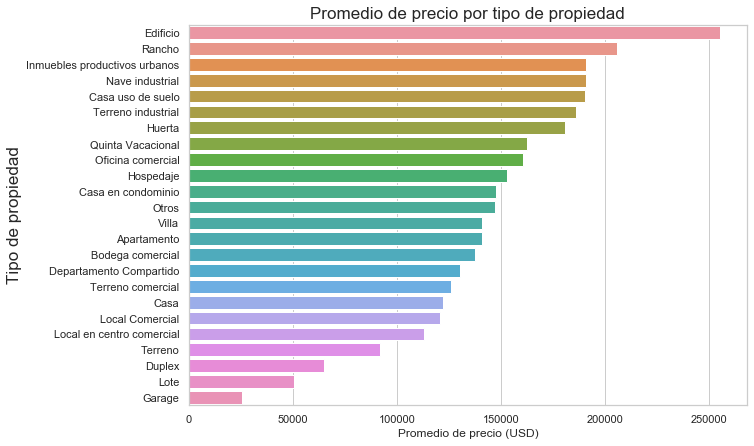

In [62]:
#Grafico de promedio de precio por provincia
plt.rcParams['figure.figsize'] = (10, 7)
g = sns.barplot(x= train_tipoprop_precio['precio_promedio_usd'], y=train_tipoprop_precio['tipodepropiedad'], orient='h', order = train_tipoprop_precio.iloc[:, 0])
g.set_title("Promedio de precio por tipo de propiedad", fontsize=17)
g.set_xlabel("Promedio de precio (USD)", fontsize=12)
g.set_ylabel("Tipo de propiedad", fontsize=17)

## Análisis precio promedio del metro de una casa por provincia

In [65]:
train_casa = train.loc[(train['tipodepropiedad'] == 'Casa')]
train_casa['precio_metro_usd'] = (train_casa['precio']/train_casa['metrostotales']) * 0.051
train_casa_prov = train_casa.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_casa_prov.reset_index(inplace = True)
train_casa_prov = train_casa_prov[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_casa_prov.loc[:, ['provincia', 'precio_metro_usd']]

,provincia,precio_metro_usd
8,Distrito Federal,"1,026.26"
10,Edo. de México,699.36
14,Jalisco,661.62
20,Puebla,651.97
18,Nuevo León,642.27
26,Tabasco,638.97
29,Veracruz,571.77
4,Chiapas,563.83
11,Guanajuato,551.44
23,San luis Potosí,550.04


Text(0, 0.5, 'Provincia')

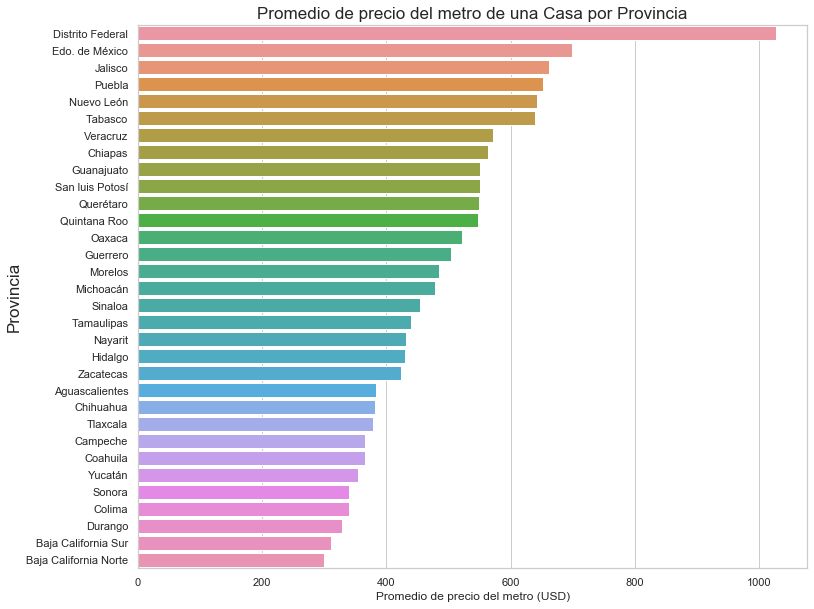

In [67]:
plt.rcParams['figure.figsize'] = (12, 10)
g = sns.barplot(x= train_casa_prov['precio_metro_usd'], y=train_casa_prov['provincia'], orient='h', order = train_casa_prov.iloc[:,0])
g.set_title("Promedio de precio del metro de una Casa por Provincia", fontsize=17)
g.set_xlabel("Promedio de precio del metro (USD)", fontsize=12)
g.set_ylabel("Provincia", fontsize=17)

## Análisis cantidad de casas por provincia

In [69]:
train_casa.provincia.value_counts()

Edo. de México           25938
Distrito Federal         15812
Jalisco                  14196
Nuevo León               11477
Querétaro                11396
Puebla                    6577
Yucatán                   6472
San luis Potosí           5612
Morelos                   4626
Veracruz                  4445
Chihuahua                 3891
Coahuila                  3329
Baja California Norte     2769
Sonora                    2732
Quintana Roo              2343
Guanajuato                2318
Hidalgo                   2134
Durango                   1995
Michoacán                 1981
Tamaulipas                1822
Baja California Sur       1473
Sinaloa                   1449
Aguascalientes            1340
Nayarit                    978
Chiapas                    903
Colima                     777
Tabasco                    722
Tlaxcala                   716
Guerrero                   578
Oaxaca                     529
Campeche                   210
Zacatecas                   80
Name: pr

Text(0.5, 1.0, 'Cantidad de casas por provincia')

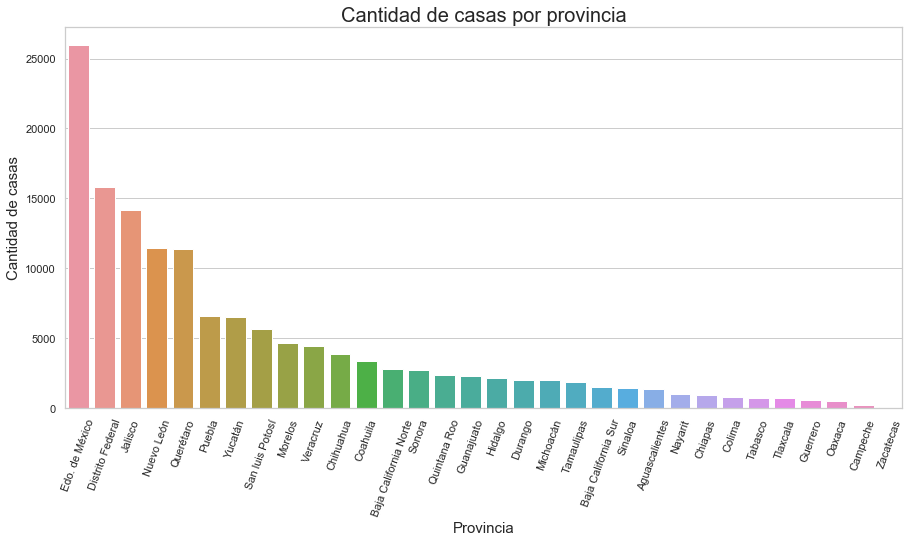

In [72]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_casa, order=train_casa.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de casas", fontsize=15)
g.set_title("Cantidad de casas por provincia", fontsize=20)

## Análisis precio promedio del metro de un apartamento por provincia

In [71]:
train_apartamento = train.loc[(train['tipodepropiedad'] == 'Apartamento')]
train_apartamento_prov = train_apartamento.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_apartamento_prov.reset_index(inplace = True)
train_apartamento_prov = train_apartamento_prov[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_apartamento_prov.loc[:, ['provincia', 'precio_metro_usd']]

,provincia,precio_metro_usd
0,Aguascalientes,"1,929.64"
8,Distrito Federal,"1,349.72"
17,Nayarit,"1,225.15"
18,Nuevo León,"1,191.67"
22,Quintana Roo,"1,065.15"
12,Guerrero,978.70
14,Jalisco,945.23
10,Edo. de México,935.05
2,Baja California Sur,931.46
7,Colima,885.40


Text(0, 0.5, 'Provincia')

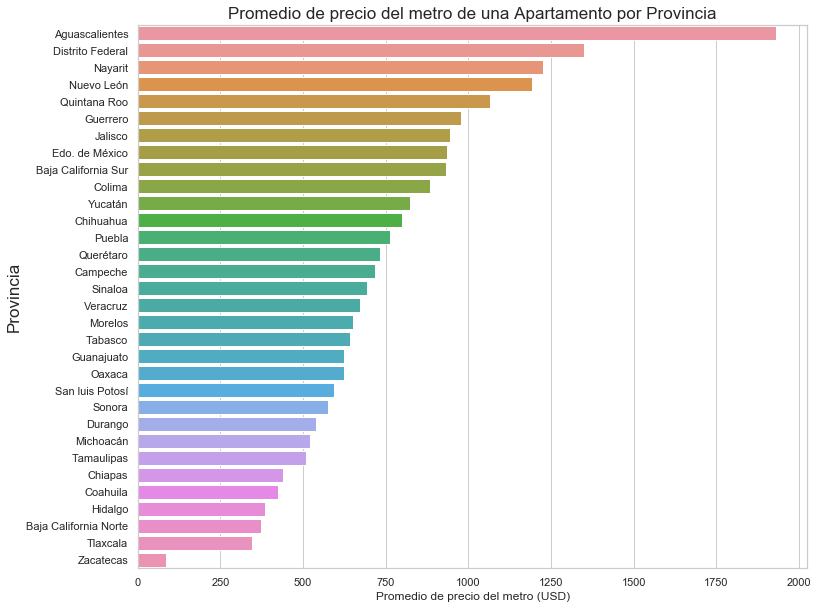

In [75]:
plt.rcParams['figure.figsize'] = (12, 10)
g = sns.barplot(x= train_apartamento_prov['precio_metro_usd'], y=train_apartamento_prov['provincia'], orient='h', order = train_apartamento_prov.iloc[:,0])
g.set_title("Promedio de precio del metro de una Apartamento por Provincia", fontsize=17)
g.set_xlabel("Promedio de precio del metro (USD)", fontsize=12)
g.set_ylabel("Provincia", fontsize=17)

## Análisis cantidad de apartamentos por provincia

In [76]:
train_apartamento.provincia.value_counts()


Distrito Federal         33839
Edo. de México            8297
Jalisco                   2638
Nuevo León                1847
San luis Potosí           1686
Guerrero                  1586
Puebla                    1522
Quintana Roo              1273
Querétaro                 1084
Morelos                    859
Yucatán                    573
Veracruz                   565
Tamaulipas                 232
Baja California Norte      196
Michoacán                  158
Guanajuato                 148
Nayarit                    107
Tabasco                     97
Sinaloa                     86
Colima                      83
Baja California Sur         82
Chiapas                     52
Hidalgo                     51
Oaxaca                      49
Aguascalientes              47
Chihuahua                   41
Tlaxcala                    31
Durango                     26
Coahuila                    20
Sonora                      17
Campeche                     7
Zacatecas                    1
Name: pr

Text(0.5, 1.0, 'Cantidad de apartamentos por provincia')

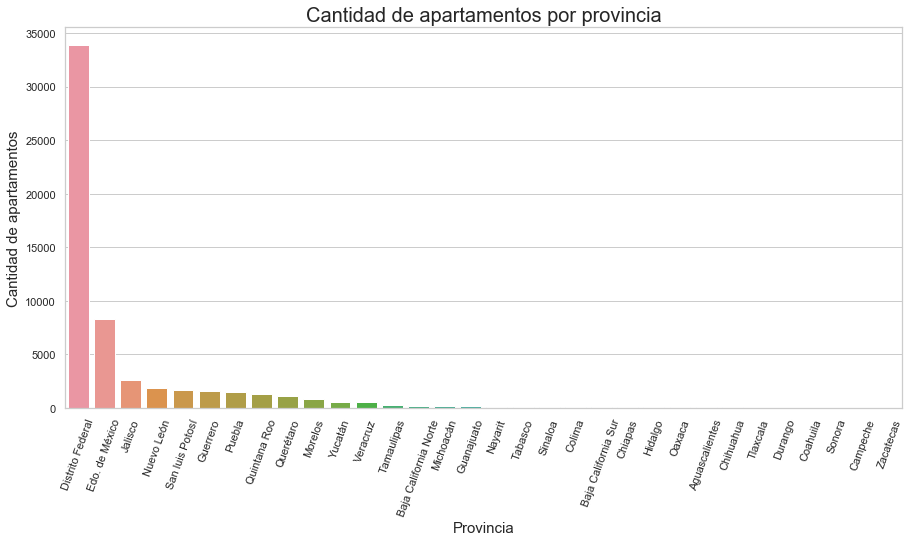

In [77]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_apartamento, order=train_apartamento.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de apartamentos por provincia", fontsize=20)


## Desviación estandar de precio (general vs casa vs apartamento)

In [7]:
#Desviacion Estandar de precio por provincia
train_provincia_std = train.groupby('provincia').agg({'precio':'std'})
train_provincia_std.reset_index(inplace = True)
train_provincia_std = train_provincia_std[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_provincia_std = train_provincia_std.rename(columns={'precio':'desviacion_estandar'})
train_provincia_std['desviacion_estandar'] = train_provincia_std['desviacion_estandar'] * 0.051

#Desviacion Estandar de precio de Casa por provincia
train_provincia_std_casa = train.loc[train['tipodepropiedad'] == 'Casa'].groupby('provincia').agg({'precio':'std'})
train_provincia_std_casa.reset_index(inplace = True)
train_provincia_std_casa = train_provincia_std_casa[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_provincia_std_casa = train_provincia_std_casa.rename(columns={'precio':'desviacion_estandar_casa'})
train_provincia_std_casa['desviacion_estandar_casa'] = train_provincia_std_casa['desviacion_estandar_casa'] * 0.051

#Desviacion Estandar de precio de Apartamento por provincia
train_provincia_std_apart = train.loc[train['tipodepropiedad'] == 'Apartamento'].groupby('provincia').agg({'precio':'std'})
train_provincia_std_apart.reset_index(inplace = True)
train_provincia_std_apart = train_provincia_std_apart[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_provincia_std_apart = train_provincia_std_apart.rename(columns={'precio':'desviacion_estandar_apart'})
train_provincia_std_apart['desviacion_estandar_apart'] = train_provincia_std_apart['desviacion_estandar_apart'] * 0.051

train_join_provincia_std = pd.merge(train_provincia_std, train_provincia_std_casa, how = 'inner', on='provincia')
train_join_provincia_std = pd.merge(train_join_provincia_std, train_provincia_std_apart, how = 'inner', on='provincia')

train_join_provincia_std.dropna(inplace = True)
train_join_provincia_std

,provincia,desviacion_estandar,desviacion_estandar_casa,desviacion_estandar_apart
0,Distrito Federal,"131,073.20","126,904.95","122,793.98"
1,Nuevo León,"122,132.52","118,632.77","140,945.56"
2,Edo. de México,"119,319.16","117,746.21","126,105.13"
3,Guerrero,"116,732.09","87,023.93","130,856.23"
4,Jalisco,"100,194.63","96,105.62","114,246.05"
5,Puebla,"92,583.76","94,012.45","81,410.95"
7,Quintana Roo,"90,433.59","86,923.11","98,049.67"
8,Tabasco,"88,874.62","84,751.66","87,365.23"
9,Chiapas,"80,276.54","67,359.54","60,772.48"
10,Morelos,"79,743.60","81,443.65","58,781.21"


Text(0.5, 1.0, 'Desviación estándar general vs Casa vs Apartamento por Provincia')

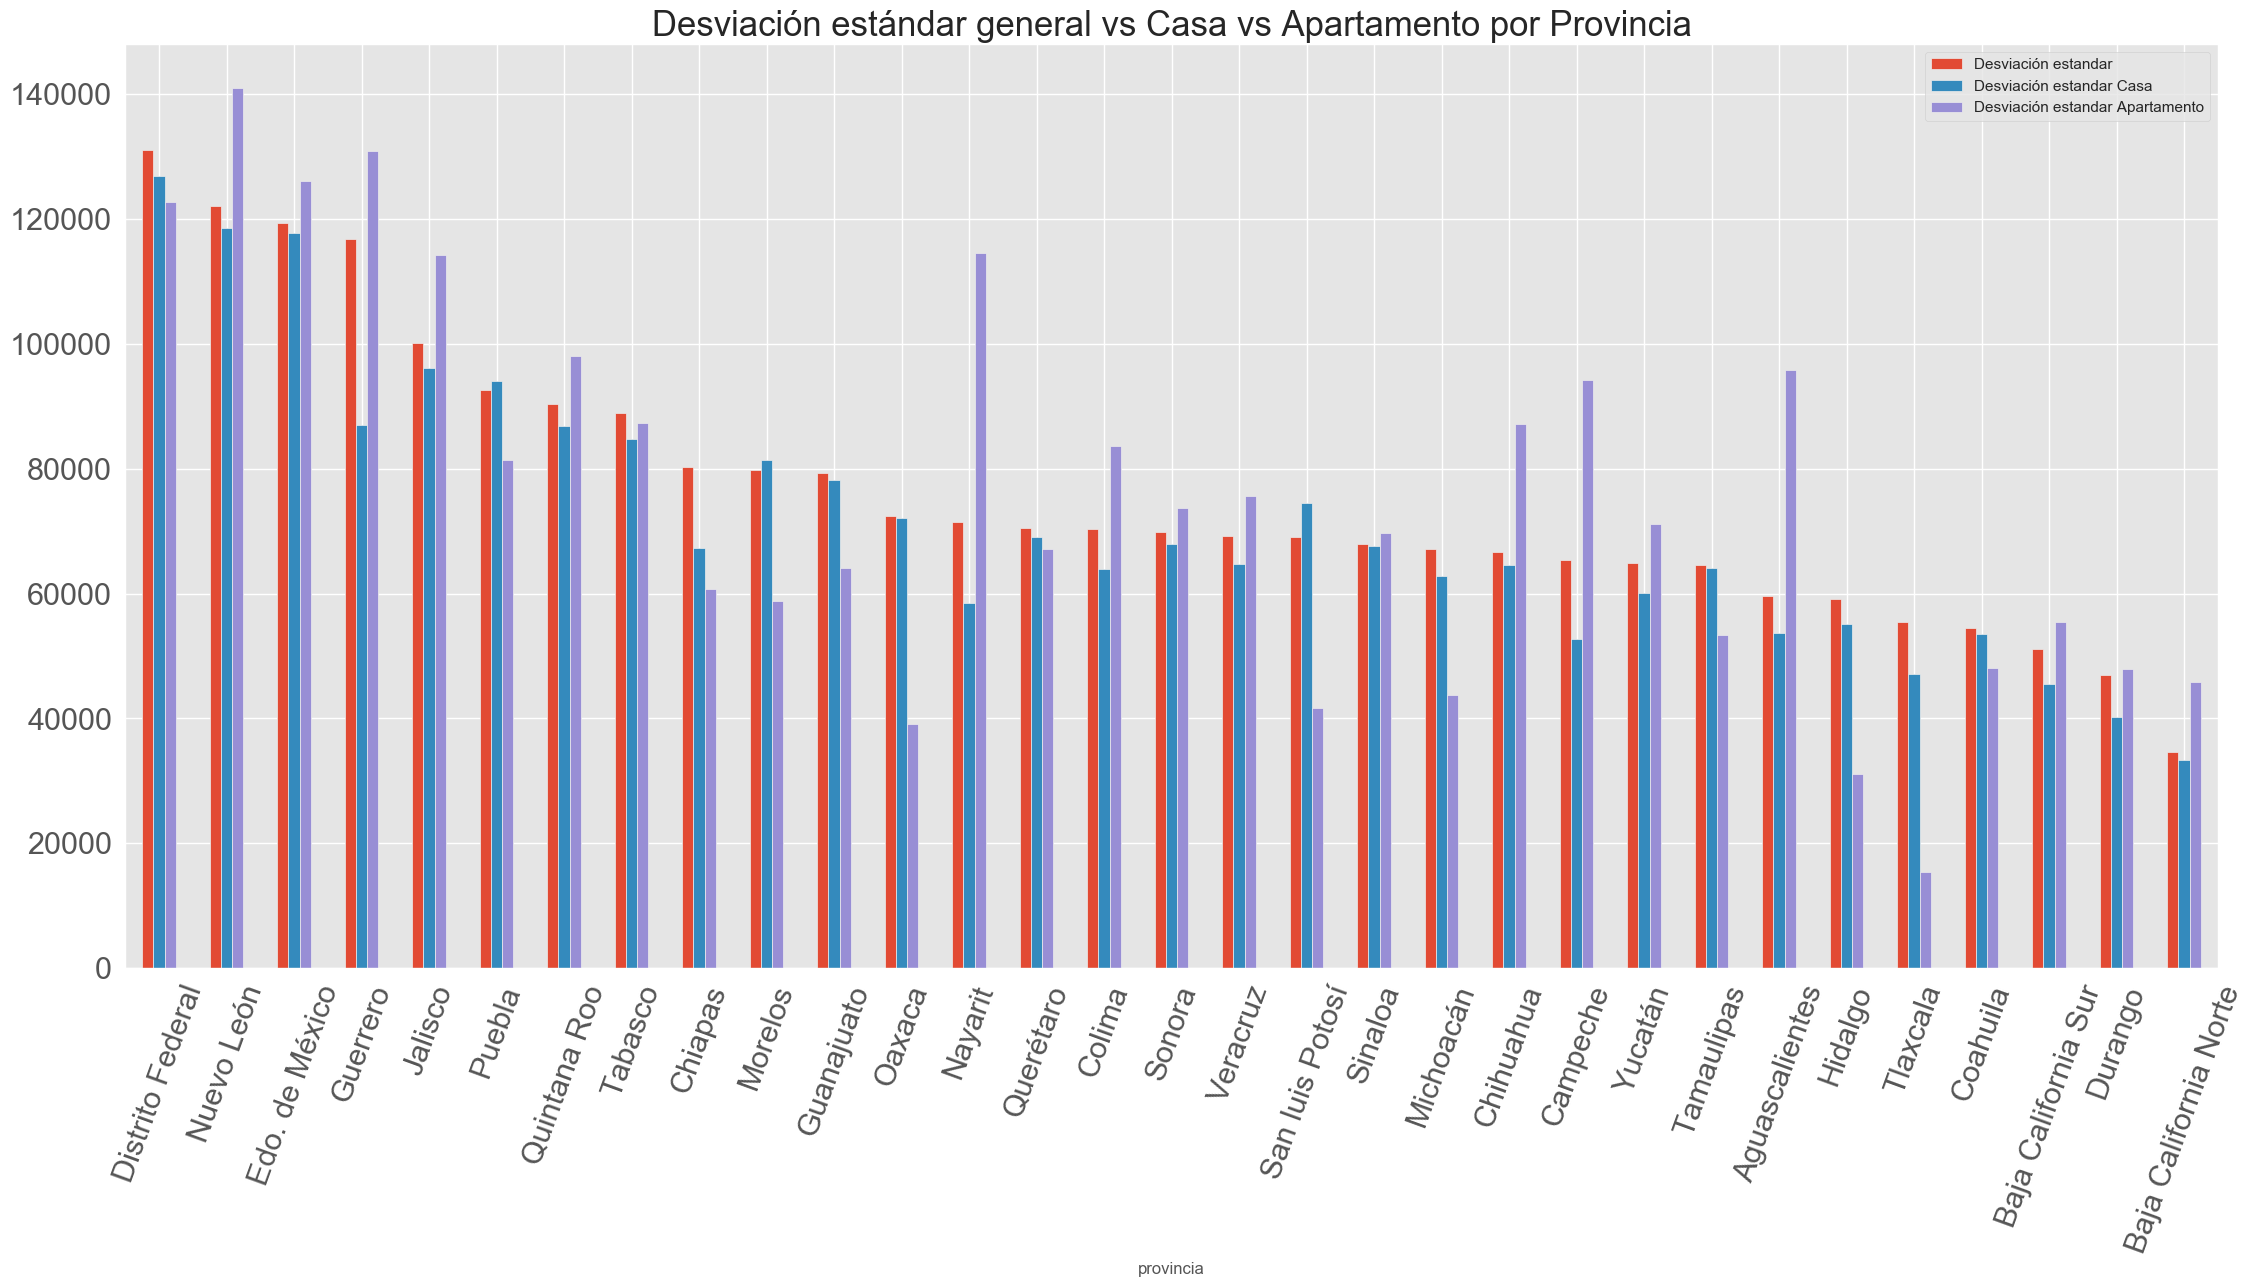

In [148]:
index = train_join_provincia_std['provincia']
std = train_join_provincia_std['desviacion_estandar'].values.tolist()
std_casa = train_join_provincia_std['desviacion_estandar_casa'].values.tolist()
std_apart = train_join_provincia_std['desviacion_estandar_apart'].values.tolist()

df = pd.DataFrame({'Desviación estandar': std,
                   'Desviación estandar Casa': std_casa,
                   'Desviación estandar Apartamento': std_apart}, index=index)

plt.rcParams['figure.figsize'] = (27, 12)
plt.style.use('ggplot')
ax = df.plot.bar(rot=70, fontsize = 22)
ax.set_title('Desviación estándar general vs Casa vs Apartamento por Provincia',fontsize= 25)

### Tiene sentido que la STD general sea mayor ya que no se tiene en cuenta el tipo de propiedad entonces la variación de precio entre cada propiedad será mayor.

In [8]:
train_join_provincia_std['desviacion_estandar_apart'].mean()

75478.53

In [10]:
train_join_provincia_std['desviacion_estandar_casa'].mean()

71306.9

In [11]:
train_join_provincia_std['desviacion_estandar'].mean()

75863.93

# Análisis de propiedades con gimnasio

In [17]:
train['precio_metro_usd'] = (train['precio']/train['metrostotales']) * 0.051
train_gym = train.loc[(train['gimnasio'] == 1)]
train_gym.provincia.value_counts()

Distrito Federal         4410
Edo. de México           3066
Jalisco                  1344
Nuevo León                966
Querétaro                 927
Yucatán                   668
Puebla                    657
Quintana Roo              518
Guerrero                  457
Morelos                   364
Veracruz                  254
San luis Potosí           192
Guanajuato                144
Hidalgo                   127
Chihuahua                 117
Coahuila                   87
Aguascalientes             86
Durango                    83
Sonora                     83
Tamaulipas                 77
Nayarit                    76
Michoacán                  66
Baja California Norte      41
Tlaxcala                   38
Tabasco                    35
Sinaloa                    33
Chiapas                    33
Colima                     15
Baja California Sur        11
Oaxaca                      9
Campeche                    4
Zacatecas                   1
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con gimnasio por provincia')

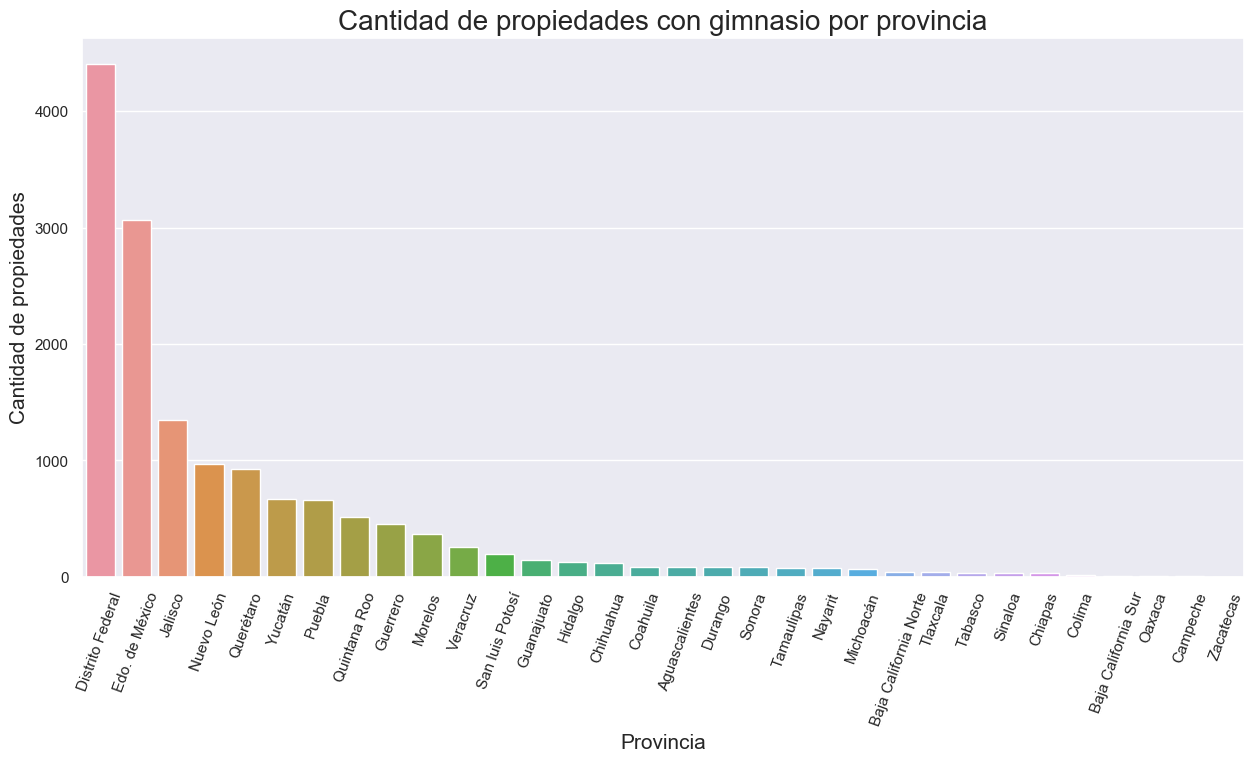

In [18]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_gym, order=train_gym['provincia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con gimnasio por provincia", fontsize=20)

## Cantidad de propiedades con gym por tipo

In [14]:
#train_gym_tipo = train_gym_tipo.loc[(train_gym_tipo['cantidad_propiedades'] > 0)]
train_gym.tipodepropiedad.value_counts()

Apartamento                      7591
Casa                             6105
Casa en condominio               1262
Departamento Compartido            34
Terreno                             1
Oficina comercial                   1
Huerta                              0
Bodega comercial                    0
Casa uso de suelo                   0
Duplex                              0
Edificio                            0
Garage                              0
Hospedaje                           0
Villa                               0
Terreno industrial                  0
Local Comercial                     0
Local en centro comercial           0
Lote                                0
Nave industrial                     0
Otros                               0
Quinta Vacacional                   0
Rancho                              0
Terreno comercial                   0
Inmuebles productivos urbanos       0
Name: tipodepropiedad, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con gimnasio por tipo')

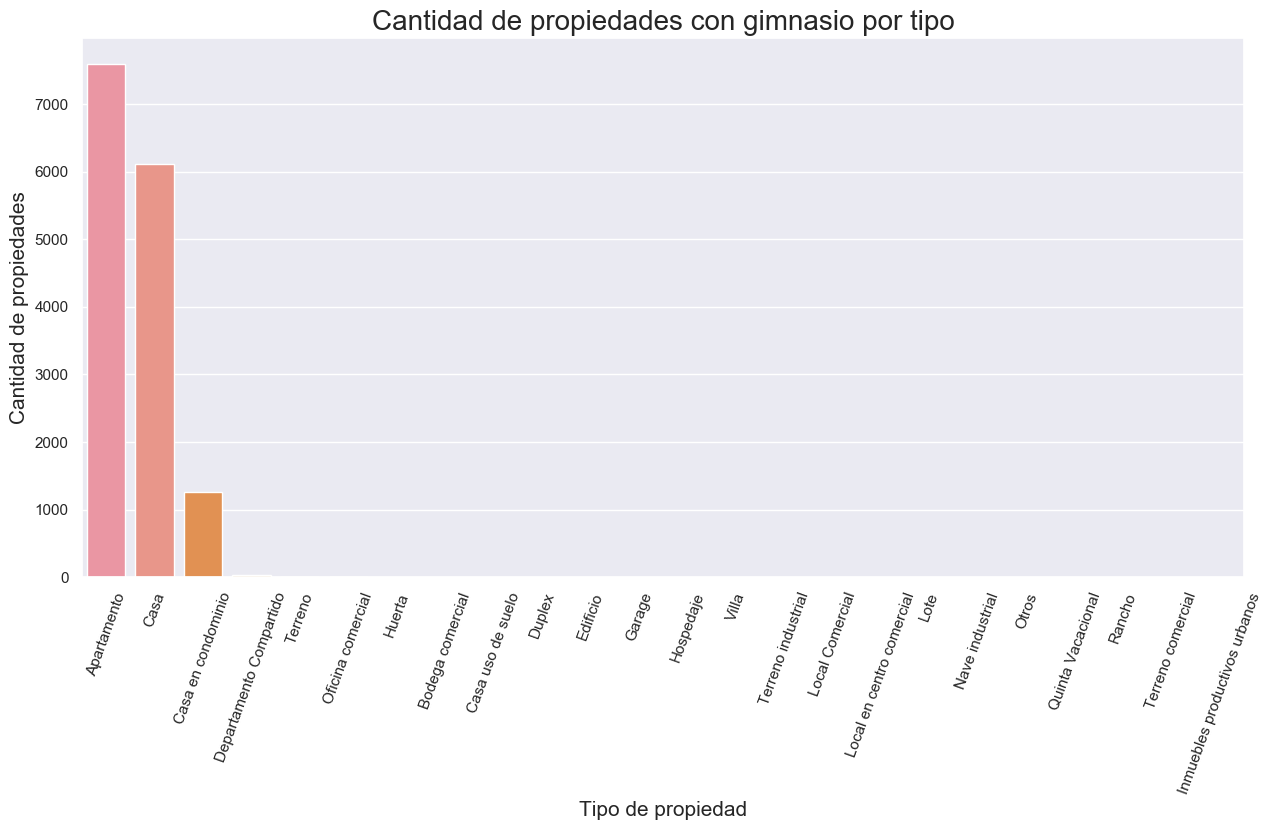

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train_gym, order=train_gym['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con gimnasio por tipo", fontsize=20)

## Cantidad de apartamentos con gym por provincia

In [20]:
train_gym_apartamento = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento')]
train_gym_apartamento.provincia.value_counts()

Distrito Federal         3764
Edo. de México           1858
Guerrero                  409
Jalisco                   399
Quintana Roo              294
Nuevo León                267
Querétaro                 198
Puebla                    155
Morelos                    73
Veracruz                   40
Yucatán                    35
Nayarit                    23
San luis Potosí            14
Baja California Norte       9
Chihuahua                   8
Guanajuato                  7
Michoacán                   7
Colima                      6
Aguascalientes              6
Coahuila                    5
Sinaloa                     4
Baja California Sur         3
Hidalgo                     2
Tabasco                     2
Oaxaca                      1
Sonora                      1
Campeche                    1
Durango                     0
Tamaulipas                  0
Chiapas                     0
Tlaxcala                    0
Zacatecas                   0
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con gimnasio por provincia')

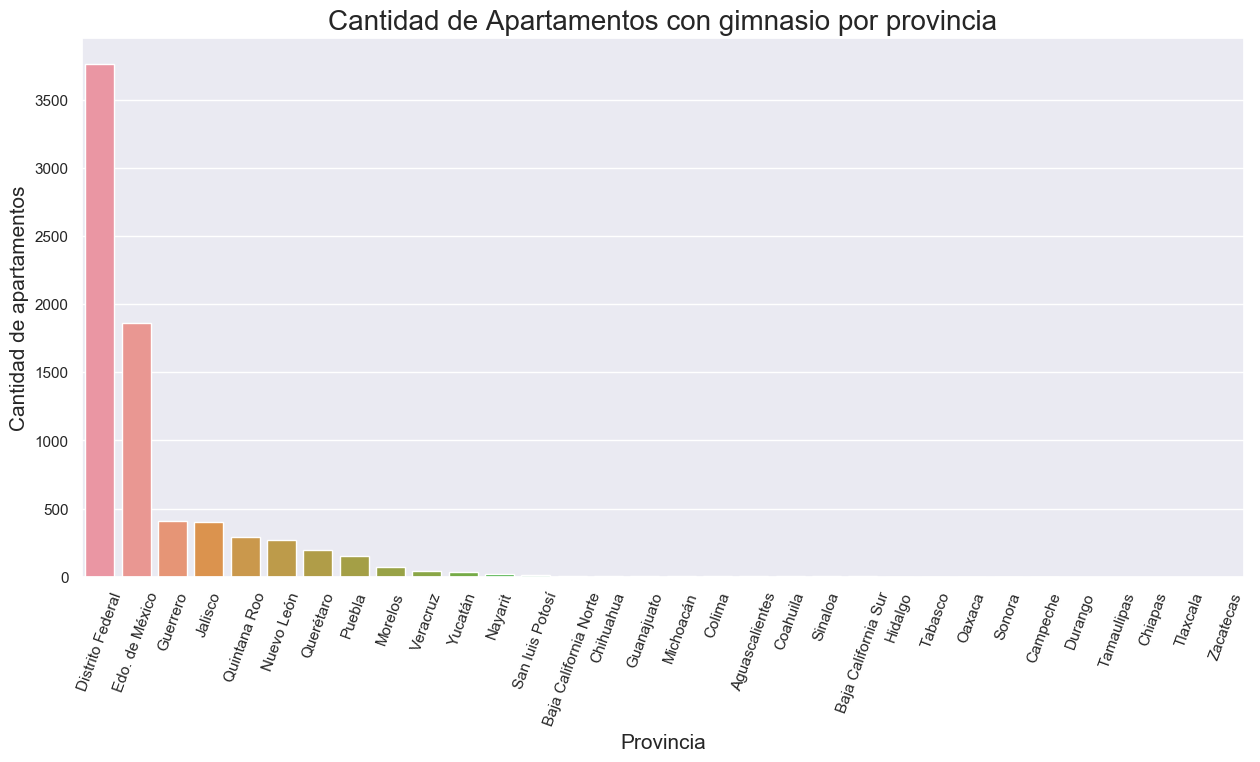

In [21]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_gym_apartamento, order=train_gym_apartamento.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con gimnasio por provincia", fontsize=20)

## Cantidad de casas con gym por provincia

In [22]:
train_gym_casa = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Casa')]
train_gym_casa.provincia.value_counts()

Edo. de México           896
Jalisco                  700
Nuevo León               693
Yucatán                  596
Querétaro                579
Distrito Federal         403
Puebla                   390
Morelos                  243
Veracruz                 213
Quintana Roo             191
San luis Potosí          173
Hidalgo                  121
Guanajuato               119
Chihuahua                109
Durango                   82
Sonora                    81
Coahuila                  81
Tamaulipas                77
Aguascalientes            58
Michoacán                 54
Nayarit                   47
Tlaxcala                  38
Tabasco                   32
Chiapas                   31
Baja California Norte     30
Sinaloa                   29
Guerrero                  17
Baja California Sur        5
Oaxaca                     4
Colima                     4
Campeche                   3
Zacatecas                  1
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de Casas con gimnasio por provincia')

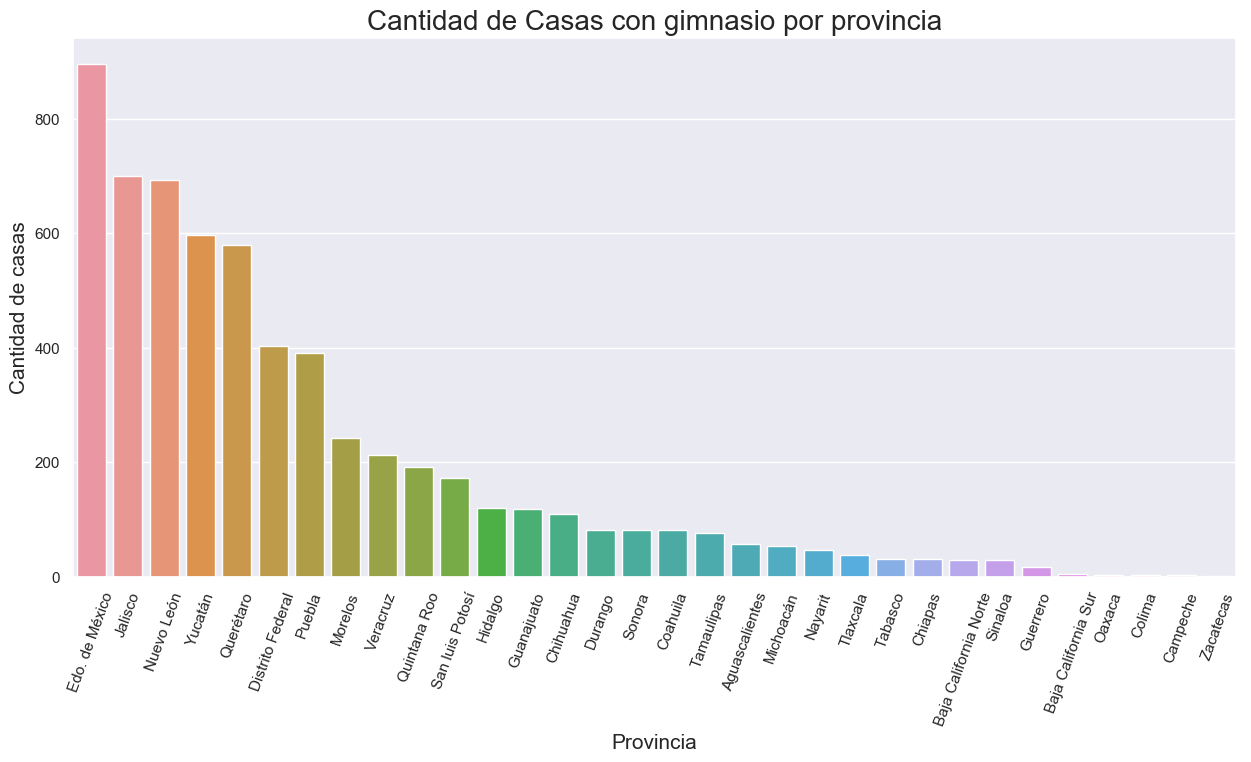

In [23]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_gym_casa, order=train_gym_casa.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de casas", fontsize=15)
g.set_title("Cantidad de Casas con gimnasio por provincia", fontsize=20)

## Cantidad de apartamentos con gimnasio por ciudad de DF

In [24]:
train_gym_apartamento_dfed = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal')]

train_gym_apartamento_dfed.ciudad.value_counts()

Miguel Hidalgo            854
Alvaro Obregón            844
Cuajimalpa de Morelos     624
Benito Juárez             589
Cuauhtémoc                389
Coyoacán                  132
Tlalpan                    93
Azcapotzalco               86
La Magdalena Contreras     34
Gustavo A. Madero          33
Venustiano Carranza        30
Iztacalco                  24
Iztapalapa                 24
Tláhuac                     3
Xochimilco                  3
otra                        2
Name: ciudad, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con gimnasio por ciudad de Distrito Federal')

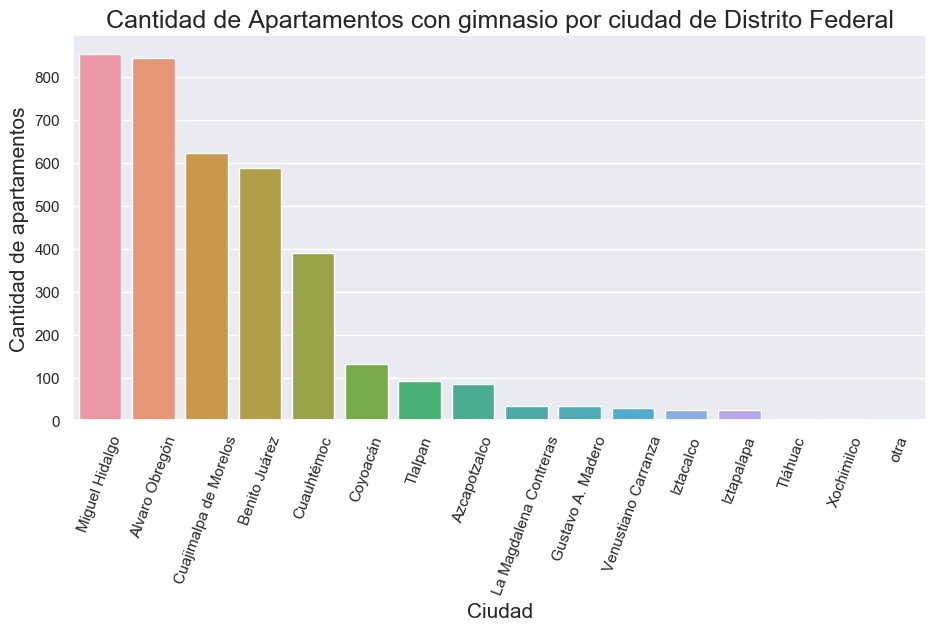

In [26]:
plt.rcParams['figure.figsize'] = (11, 5)
g = sns.countplot(x='ciudad', data=train_gym_apartamento_dfed, order=train_gym_apartamento_dfed.ciudad.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Ciudad", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con gimnasio por ciudad de Distrito Federal", fontsize=18)

## Variación de precio entre propiedades con o sin gym

In [27]:
# VARIACION DE PRECIOS PARA PROPIEDADES CON O SIN GYM POR PROVINCIA

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 1) & (train['metrostotales'].notnull())]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='provincia')
train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym


,provincia,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Distrito Federal,"1,184.91","1,681.66",-496.75
1,Tabasco,714.54,622.94,91.60
2,Guerrero,714.11,478.12,235.99
3,Edo. de México,711.35,"1,016.09",-304.74
4,Nuevo León,690.50,650.97,39.52
5,Puebla,679.01,866.78,-187.76
6,Jalisco,659.74,"1,090.70",-430.96
7,Quintana Roo,589.35,877.80,-288.45
9,Guanajuato,578.29,480.72,97.57
10,Veracruz,546.38,603.60,-57.22


### ESTO ES MEDIO INEXACTO PORQUE NO SE TIENEN EN CUENTA OTROS FACTORES COMO TIPO DE PROPIEDAD, ANTIGUEDAD, PROVINCIA, CIUDAD. SE NOTA QUE ES INEXACTO YA QUE HAY VARIACIONES POSITIVAS Y NEGATIVAS

In [28]:
# Promedio de variacion entre el precio por metro de una propiedad con gym y sin gym 
train_join_consingym['variacion'].mean()

-169.93869

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

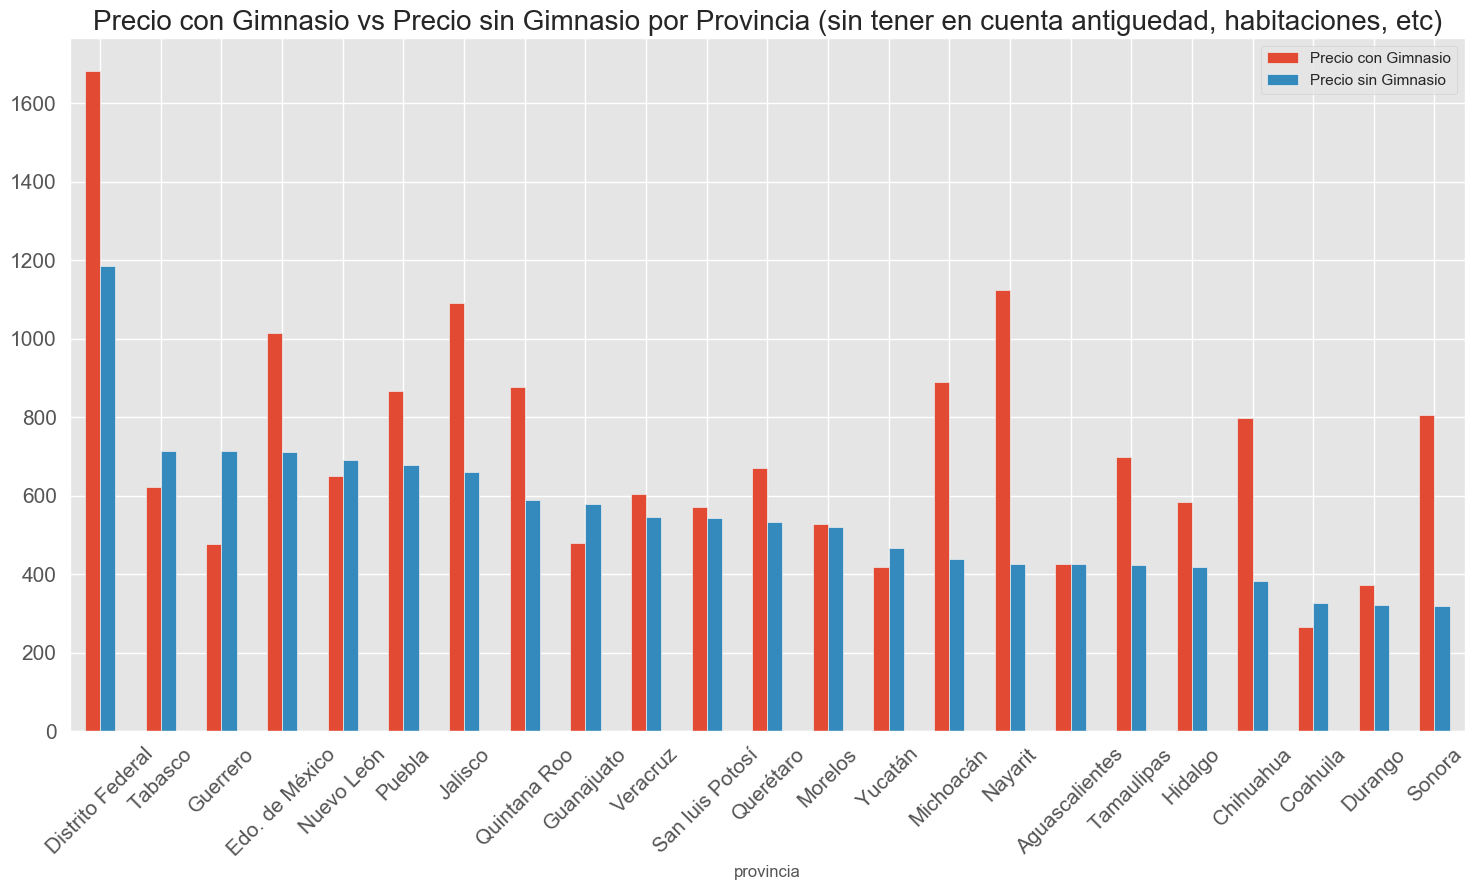

In [29]:
index = train_join_consingym['provincia']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20)

### Se hace lo mismo teniendo en cuenta el tipo de propiedad (Apartamento ya que hay mas datos)

In [30]:
# HAGO LO MISMO TENIENDO EN CUENTA EL TIPO DE PROPIEDAD YA QUE ANTES, EL PRECIO DE PROPIEDADES COMO EDIFICIOS, TERRENOS, ETC
# AFECTABA LA VARIACION

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())
                             & (train['tipodepropiedad'] == 'Apartamento')]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['tipodepropiedad'] == 'Apartamento')]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='provincia')
train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
1,Distrito Federal,"1,294.14","1,807.18",-513.05
2,Nayarit,"1,215.79","1,123.73",92.06
3,Nuevo León,"1,099.31","1,363.14",-263.83
7,Jalisco,893.12,"1,347.62",-454.50
8,Edo. de México,882.63,"1,314.61",-431.98
10,Yucatán,839.05,819.64,19.41
11,Puebla,814.44,"1,215.58",-401.15
12,Chihuahua,745.76,"1,590.00",-844.24
13,Querétaro,700.28,756.73,-56.45
17,Morelos,647.70,768.92,-121.23


In [31]:
# Promedio de variacion entre el precio por metro de un Apartamento con gym y sin gym 
train_join_consingym['variacion'].mean()

-339.94467

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

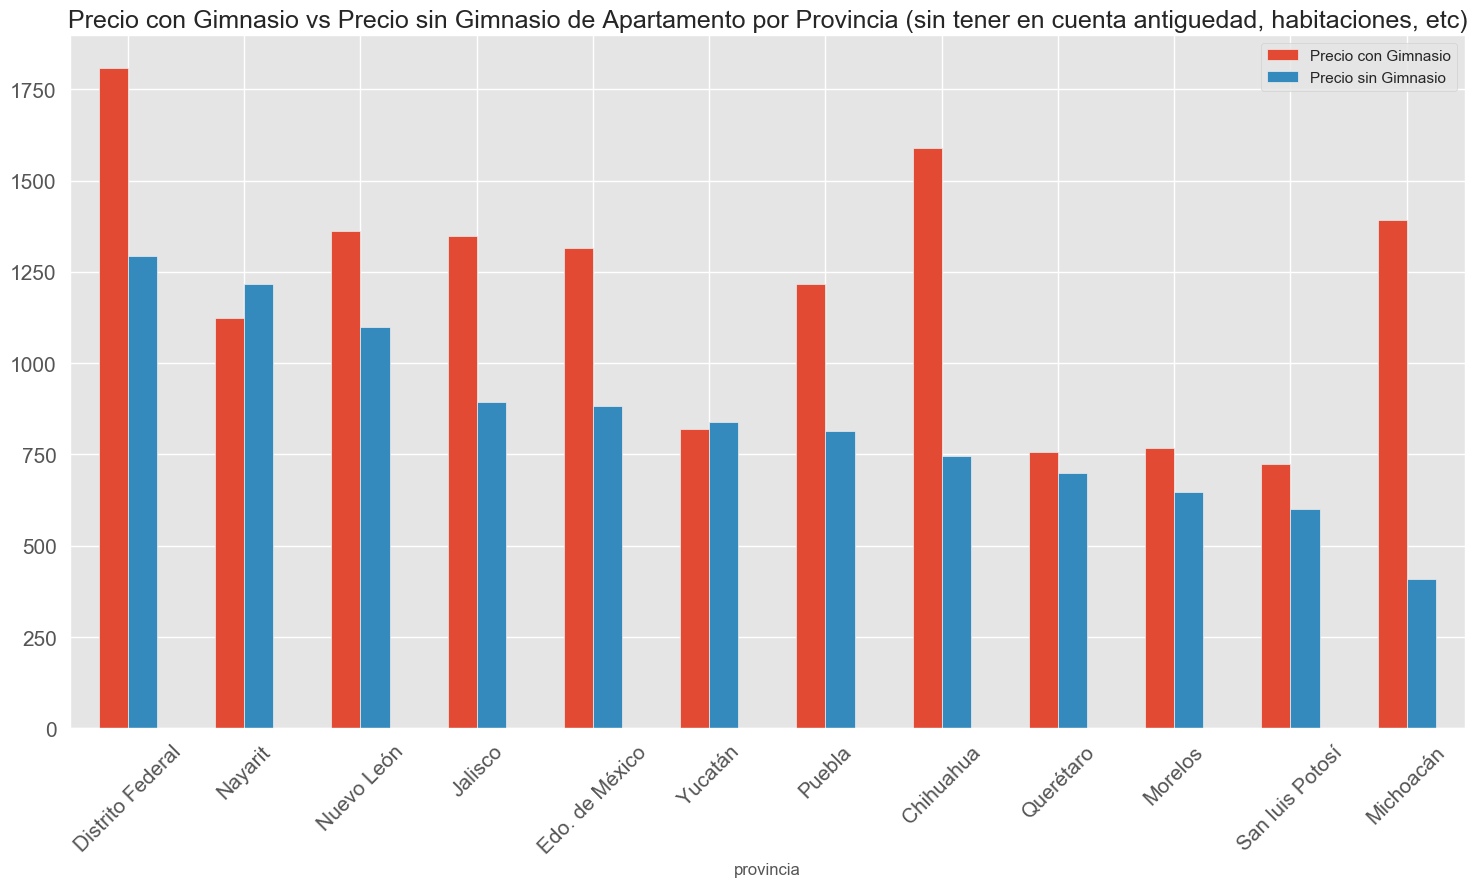

In [32]:
index = train_join_consingym['provincia']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 18)

### Vamos a tomar mas datos en cuenta para que sea mas exacto el análisis. Voy a elegir la antiguedad donde mas datos haya para el análisis.

In [33]:
train_gym_apartamento_dfed_hid = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Miguel Hidalgo')]

train_gym_apartamento_dfed_hid.antiguedad.value_counts()

 5.00    217
 0.00    184
 1.00     88
 4.00     82
 3.00     74
 2.00     50
10.00     47
20.00     19
 8.00      9
 6.00      9
 7.00      6
12.00      3
11.00      3
 9.00      3
15.00      2
21.00      1
14.00      1
18.00      1
30.00      1
17.00      1
Name: antiguedad, dtype: int64

### Tomo 5 años ya que tengo más info ahí. Ahora averiguo que parámetros de garages, habitaciones y baños me conviene tomar.

In [34]:
train_gym_apartamento_dfed_hid = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Miguel Hidalgo') & 
                                           (train['antiguedad'] == 5)]

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid.groupby(['ciudad', 'habitaciones', 'banos', 
                                                                             'garages']).agg({'id':'count'})

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid_ant.rename(columns={'id':'cantidad_propiedades'})
train_gym_apartamento_dfed_hid_ant

cantidad_propiedades
ciudad         habitaciones banos garages                      
Miguel Hidalgo 1.00         1.00  1.00                       11
                                  2.00                        2
                            2.00  2.00                        4
               2.00         1.00  0.00                        1
                                  1.00                       10
                                  2.00                        4
                            2.00  1.00                       27
                                  2.00                       70
                                  3.00                        3
                            3.00  2.00                        4
               3.00         1.00  1.00                        3
                                  2.00                        1
                            2.00  1.00                        6
                                  2.00                       33
                                  3.00                        2
                            3.00  2.00                       17
                                  3.00                       11
               4.00         3.00  2.00                        1
                                  3.00                        1
                            4.00  3.00                        1

### Según esto, por la cantidad de propiedades que hay, me conviene tomar apartamentos de 5 años para la antiguedad, 2 habitaciones, 2 garages y 2 baños.

### Hago el mismo análisis para apartamentos de 5 años de antiguedad en Distrito federal

In [35]:
# FIJO LA PROVINCIA A DISTRITO FEDERAL YA QUE TENGO MAS DATOS AHI QUE EN OTRAS PROVINCIAS

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 5) & (train['tipodepropiedad'] == 'Apartamento')]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &   (train['tipodepropiedad'] == 'Apartamento')]

train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='ciudad')

train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Cuajimalpa de Morelos,"1,613.59","1,960.30",-346.70
1,Miguel Hidalgo,"1,461.30","2,028.87",-567.57
2,Benito Juárez,"1,324.69","1,821.48",-496.79
3,Cuauhtémoc,"1,307.59","1,530.99",-223.40
4,La Magdalena Contreras,"1,198.56","1,162.42",36.14
5,Alvaro Obregón,"1,101.42","1,926.15",-824.73
6,Tlalpan,996.56,"1,710.00",-713.44
7,Coyoacán,904.71,"1,567.11",-662.40
8,Azcapotzalco,791.48,"1,081.28",-289.81
9,Venustiano Carranza,674.93,912.38,-237.45


In [36]:
train_join_consingym['variacion'].mean()

-463.776

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)')

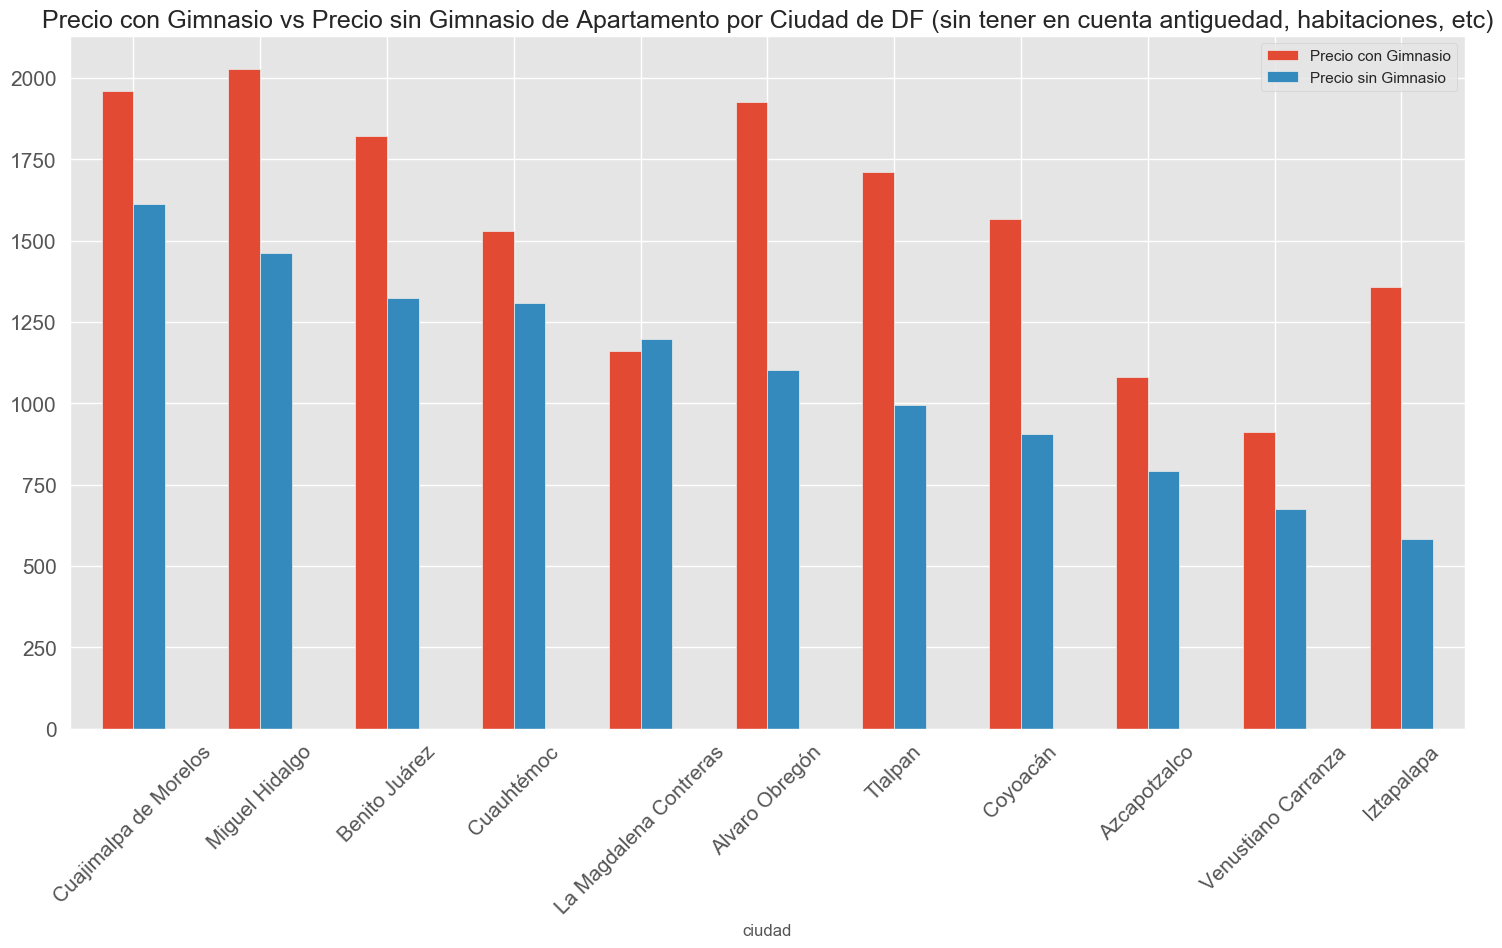

In [37]:
index = train_join_consingym['ciudad']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 18)

## Variación de precio con y sin gym para apartamentos de 5 años de antiguedad, con 2 habitaciones, 2 garages y 2 baños por ciudad de Distrito Federal

In [38]:
# ENTONCES COMO ENCUENTRO MAS INFO, TOMO ANTIGUEDAD = 5, HABITACIONES = 2, BAÑOS = 2, GARAGES = 2

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 5) & (train['tipodepropiedad'] == 'Apartamento') &
                        (train['garages'] == 2)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &   (train['tipodepropiedad'] == 'Apartamento')  &
                        (train['antiguedad'] == 5) & 
                        (train['garages'] == 2)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='ciudad')

train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Miguel Hidalgo,"2,342.94","2,968.75",-625.81
1,Benito Juárez,"1,538.06","1,586.67",-48.60
2,Alvaro Obregón,"1,388.70","1,754.91",-366.20


In [39]:
# Promedio
train_join_consingym['variacion'].mean()

-346.8716

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (con 5 años de antiguedad, 2 haitaciones, 2 garages y 2 baños)')

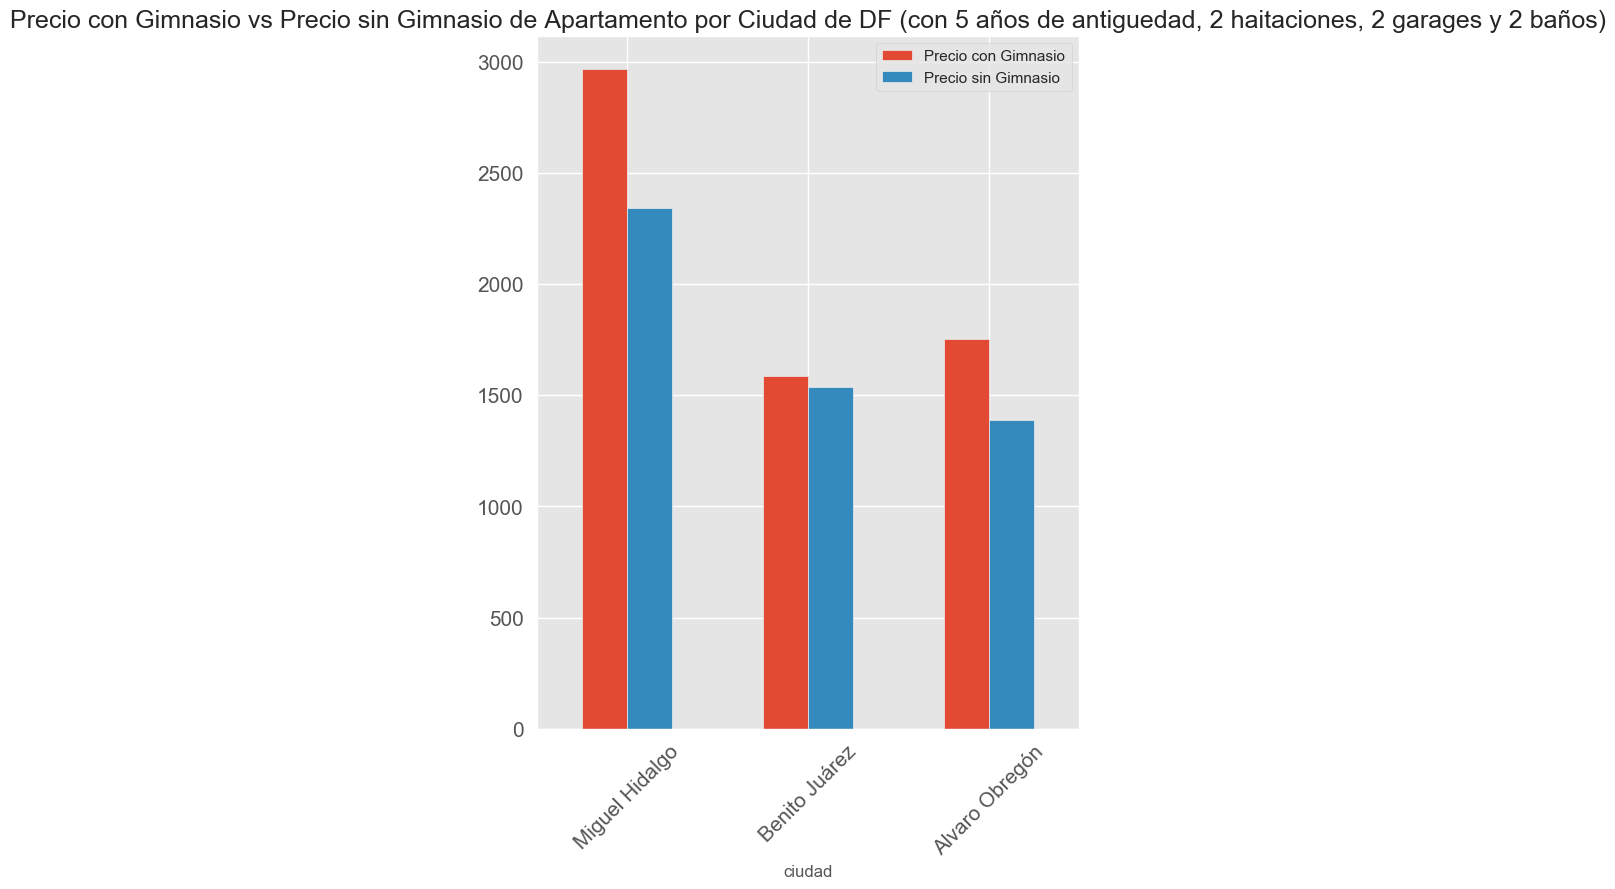

In [40]:
index = train_join_consingym['ciudad']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (7, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (con 5 años de antiguedad, 2 haitaciones, 2 garages y 2 baños)',fontsize= 18)

# Análisis de propiedades con centros comerciales cercanos

### Cantidad de propiedades con centros comerciales cercanos por provincia

In [48]:
train_ccc = train.loc[(train['centroscomercialescercanos'] == 1)]
train_ccc.provincia.value_counts()

Distrito Federal         26185
Edo. de México           21243
Jalisco                   9960
Querétaro                 7084
Puebla                    5262
Nuevo León                3702
Morelos                   2676
Veracruz                  2039
Quintana Roo              1934
Yucatán                   1826
Baja California Norte     1520
Guerrero                  1494
Hidalgo                   1363
Coahuila                  1038
Chihuahua                  929
Guanajuato                 916
San luis Potosí            882
Aguascalientes             854
Michoacán                  816
Sonora                     623
Sinaloa                    457
Durango                    369
Nayarit                    323
Tlaxcala                   280
Colima                     258
Chiapas                    234
Oaxaca                     231
Baja California Sur        230
Tabasco                    225
Tamaulipas                 124
Campeche                    59
Zacatecas                   30
Name: pr

### Se podría decir que Distrito Federal es la provincia mas "comercial"

Text(0.5, 1.0, 'Cantidad de propiedades con centros comerciales cercanos por provincia')

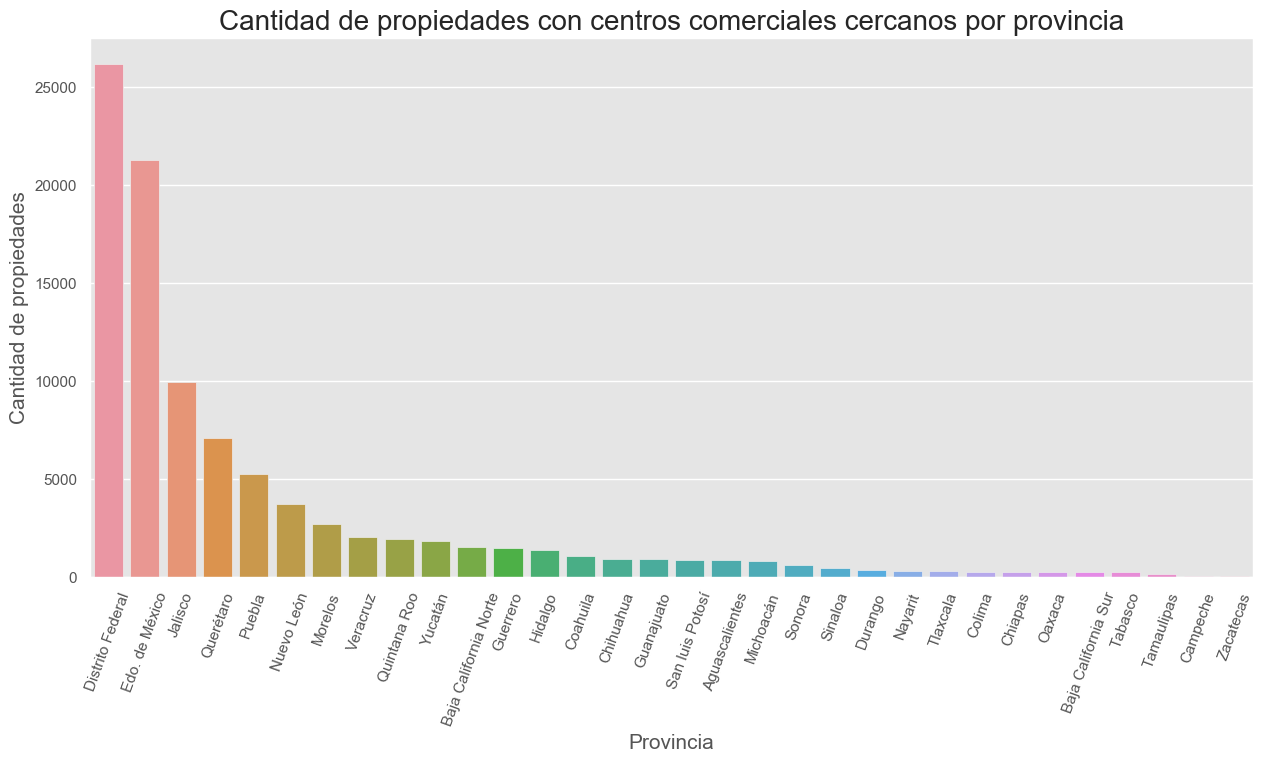

In [49]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_ccc, order=train_ccc['provincia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con centros comerciales cercanos por provincia", fontsize=20)

### Cantidad de propiedades con centros comerciales cercanos por tipo de propiedad

In [51]:
train_ccc.tipodepropiedad.value_counts()

Casa                             54641
Apartamento                      25852
Casa en condominio                8869
Terreno                           3075
Local Comercial                    732
Oficina comercial                  508
Edificio                           438
Bodega comercial                   237
Casa uso de suelo                  224
Terreno comercial                  190
Departamento Compartido             94
Inmuebles productivos urbanos       88
Villa                               84
Local en centro comercial           80
Quinta Vacacional                   40
Rancho                              10
Huerta                               3
Duplex                               3
Terreno industrial                   0
Hospedaje                            0
Garage                               0
Lote                                 0
Nave industrial                      0
Otros                                0
Name: tipodepropiedad, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con centros comerciales cercanos por tipo')

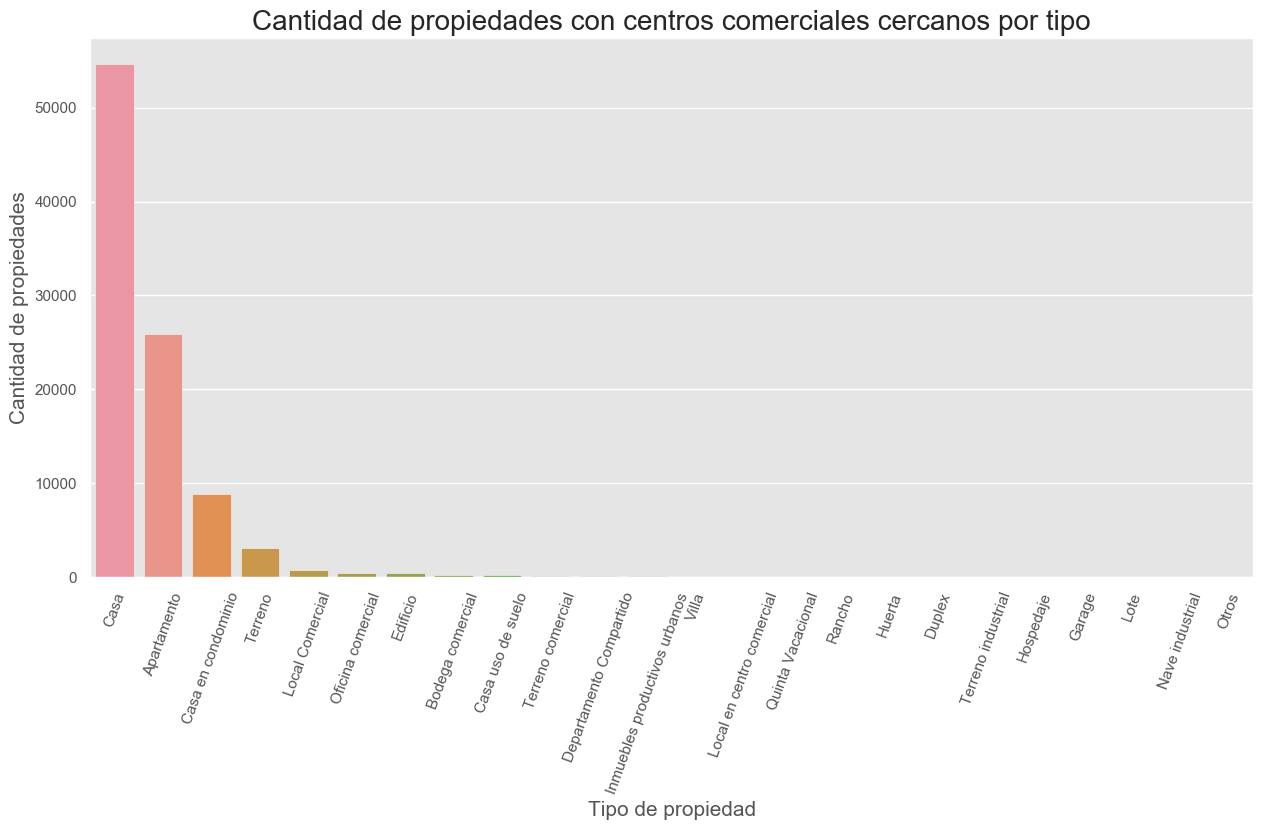

In [52]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train_ccc, order=train_ccc['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con centros comerciales cercanos por tipo", fontsize=20)

## Cantidad de apartamentos con centros comerciales cercanos por provincia

In [53]:
train_ccc_apartamento = train.loc[(train['centroscomercialescercanos'] == 1) & (train['tipodepropiedad'] == 'Apartamento')]
train_ccc_apartamento.provincia.value_counts()

Distrito Federal         15973
Edo. de México            4228
Jalisco                   1389
Guerrero                   939
Puebla                     683
Quintana Roo               601
Querétaro                  454
Nuevo León                 402
Morelos                    333
Veracruz                   180
San luis Potosí            162
Yucatán                    122
Baja California Norte       63
Michoacán                   59
Guanajuato                  40
Nayarit                     32
Colima                      29
Hidalgo                     24
Tabasco                     20
Sinaloa                     19
Aguascalientes              18
Oaxaca                      15
Tlaxcala                    14
Chihuahua                   12
Baja California Sur         11
Chiapas                      9
Tamaulipas                   6
Sonora                       4
Coahuila                     4
Durango                      3
Campeche                     2
Zacatecas                    0
Name: pr

Text(0.5, 1.0, 'Cantidad de Apartamentos con centros comerciales cercanos por provincia')

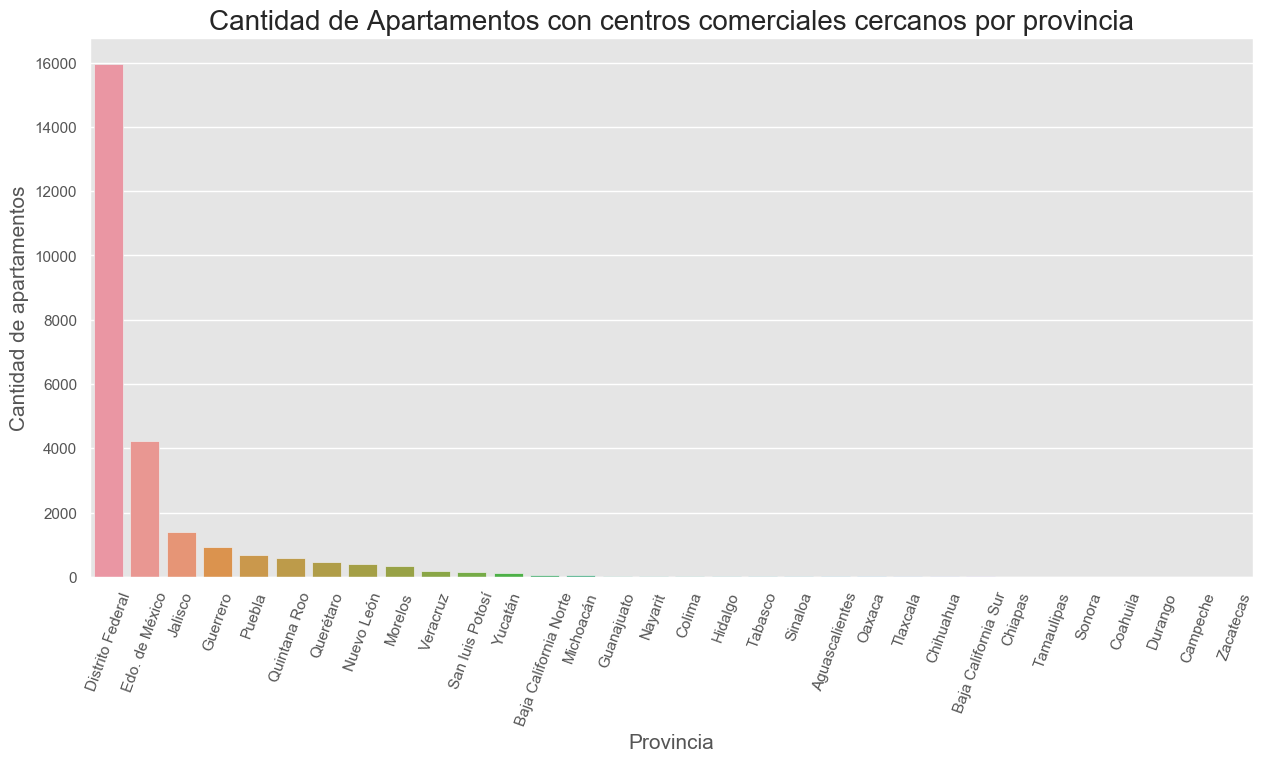

In [54]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_ccc_apartamento, order=train_ccc_apartamento.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con centros comerciales cercanos por provincia", fontsize=20)

## Cantidad de casas con centros comerciales cercanos por provincia

In [57]:
train_ccc_casa = train.loc[(train['centroscomercialescercanos'] == 1) & (train['tipodepropiedad'] == 'Casa')]
train_ccc_casa.provincia.value_counts()

Edo. de México           13708
Distrito Federal          6744
Jalisco                   6547
Querétaro                 4880
Puebla                    3454
Nuevo León                3026
Morelos                   1677
Veracruz                  1653
Yucatán                   1553
Baja California Norte     1395
Hidalgo                   1228
Quintana Roo               999
Coahuila                   973
Chihuahua                  820
Guanajuato                 779
Michoacán                  661
Aguascalientes             653
San luis Potosí            636
Sonora                     594
Sinaloa                    396
Durango                    347
Guerrero                   314
Tlaxcala                   247
Nayarit                    214
Colima                     200
Baja California Sur        200
Chiapas                    199
Oaxaca                     183
Tabasco                    176
Tamaulipas                 109
Campeche                    47
Zacatecas                   29
Name: pr

Text(0.5, 1.0, 'Cantidad de Casas con centros comerciales cercanos por provincia')

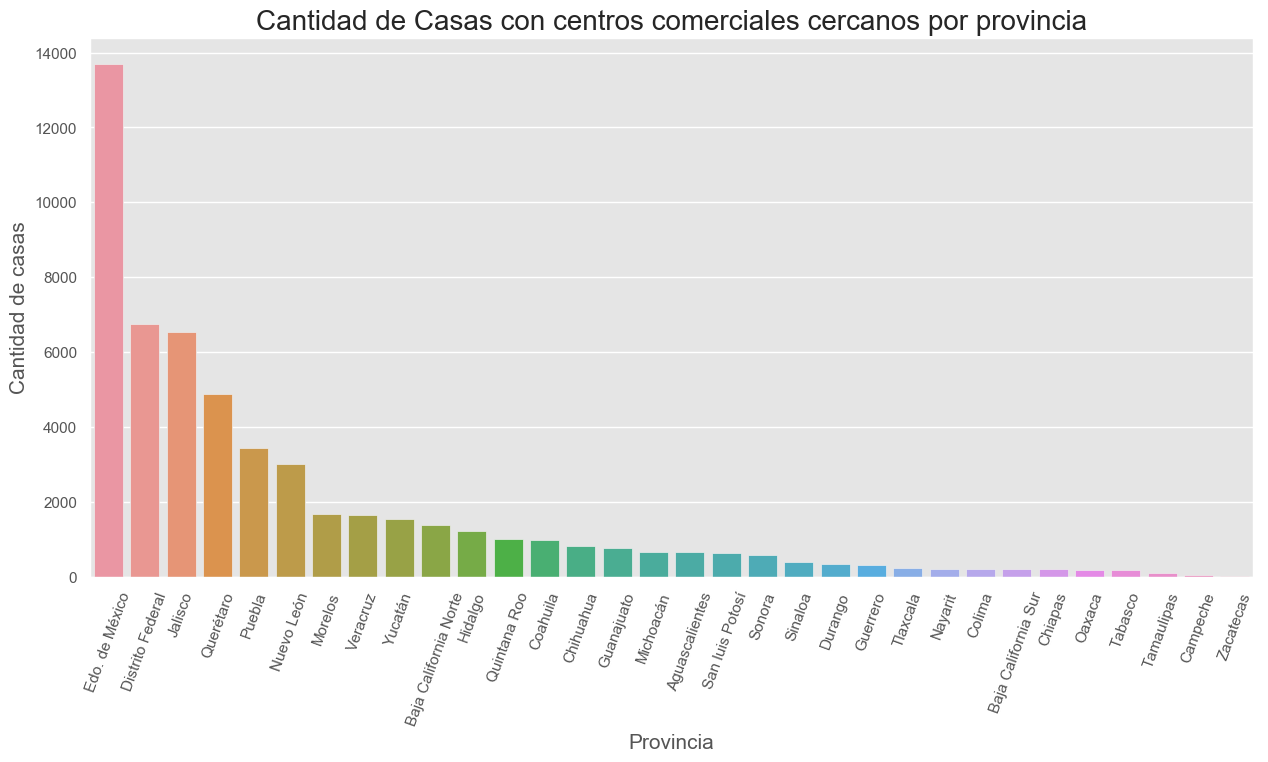

In [58]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_ccc_casa, order=train_ccc_casa.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de casas", fontsize=15)
g.set_title("Cantidad de Casas con centros comerciales cercanos por provincia", fontsize=20)

### Cantidad de apartamentos con centros comerciales cercanos por ciudad de Distrito Federal

In [59]:
train_ccc_apartamento_dfed = train.loc[(train['centroscomercialescercanos'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal')]

train_ccc_apartamento_dfed.ciudad.value_counts()

Benito Juárez             4252
Cuauhtémoc                2297
Miguel Hidalgo            2154
Alvaro Obregón            1624
Coyoacán                  1076
Tlalpan                    904
Cuajimalpa de Morelos      895
Iztapalapa                 645
Azcapotzalco               547
Gustavo A. Madero          539
Venustiano Carranza        359
Iztacalco                  253
La Magdalena Contreras     150
Xochimilco                 141
Tláhuac                    127
otra                        10
Name: ciudad, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con centros comerciales cercanos por ciudad de Distrito Federal')

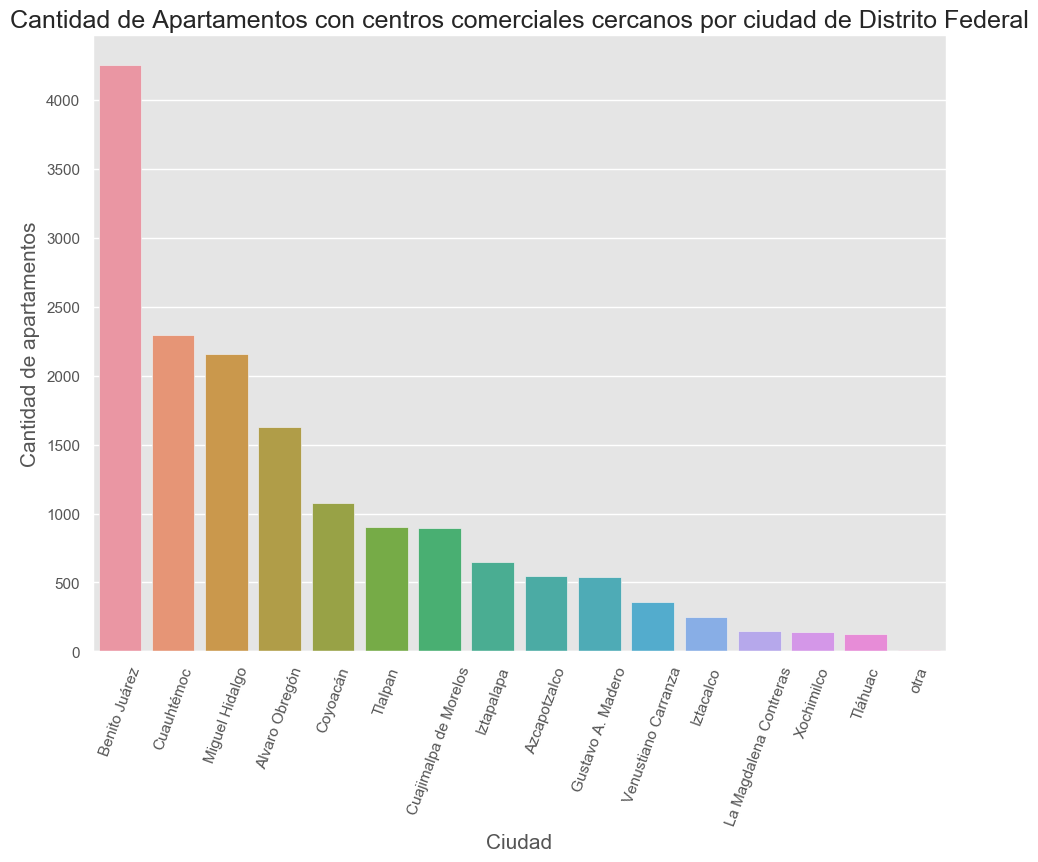

In [60]:
plt.rcParams['figure.figsize'] = (11, 8)
g = sns.countplot(x='ciudad', data=train_ccc_apartamento_dfed, order=train_ccc_apartamento_dfed.ciudad.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Ciudad", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con centros comerciales cercanos por ciudad de Distrito Federal", fontsize=18)

## Variación de precio promedio  del metro con o sin centros comerciales cercanos

#### ESTO ES MEDIO INEXACTO PORQUE NO SE TIENEN EN CUENTA OTROS FACTORES COMO TIPO DE PROPIEDAD, ANTIGUEDAD, PROVINCIA, CIUDAD. SE NOTA QUE ES INEXACTO YA QUE HAY VARIACIONES POSITIVAS Y NEGATIVAS

In [61]:
train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_conccc= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 1) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_conccc = train_conccc.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_conccc = train_conccc.reset_index()
train_conccc = train_conccc[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_conccc = train_conccc.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_ccc'})

train_join_consinccc = pd.merge(train_sin_atributo, train_conccc, how = 'inner', on='provincia')
train_join_consinccc['variacion'] = train_join_consinccc['precio_metro_usd_prom'] - train_join_consinccc['precio_metro_usd_prom_ccc']

train_join_consinccc.dropna(inplace = True)
train_join_consinccc



,provincia,precio_metro_usd_prom,precio_metro_usd_prom_ccc,variacion
0,Distrito Federal,"1,184.91","1,284.65",-99.74
1,Tabasco,714.54,590.13,124.41
2,Guerrero,714.11,641.12,72.99
3,Edo. de México,711.35,746.44,-35.09
4,Nuevo León,690.50,593.50,97.00
5,Puebla,679.01,598.17,80.84
6,Jalisco,659.74,768.40,-108.66
7,Quintana Roo,589.35,554.01,35.34
8,Chiapas,582.54,504.38,78.16
9,Guanajuato,578.29,496.33,81.97


In [62]:
train_join_consinccc['variacion'].mean()

9.1771555

Text(0.5, 1.0, 'Precio con/sin centros comerciales cercanos por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

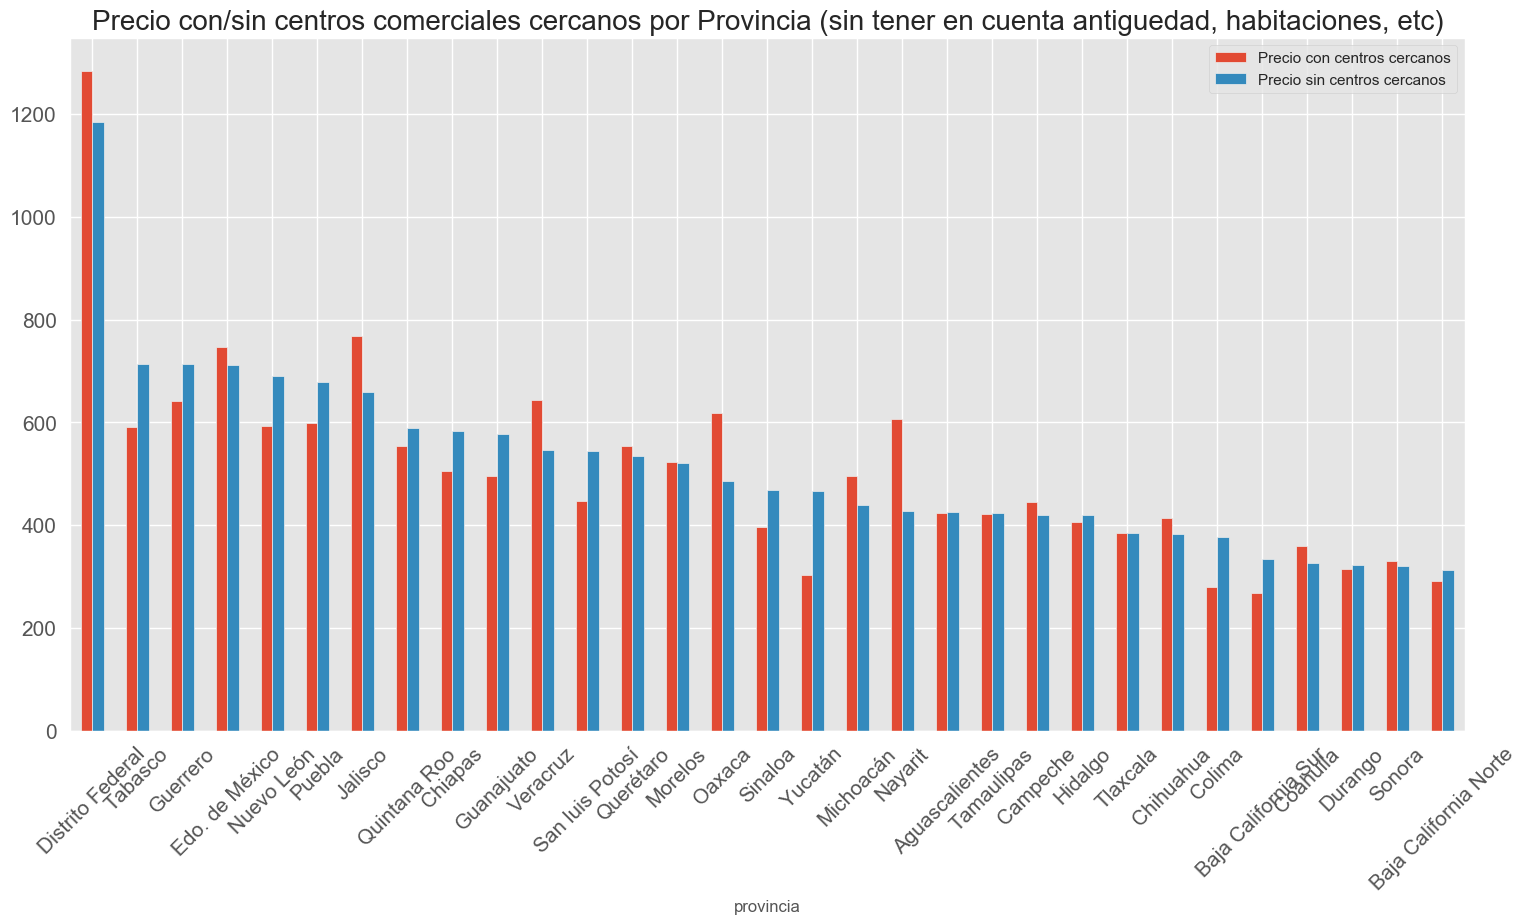

In [63]:
index = train_join_consinccc['provincia']
precio_conccc = train_join_consinccc['precio_metro_usd_prom_ccc'].values.tolist()
precio_sinccc = train_join_consinccc['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con centros cercanos': precio_conccc,
                   'Precio sin centros cercanos': precio_sinccc}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con/sin centros comerciales cercanos por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20)

## Teniendo en cuenta el tipo de propiedad

In [64]:
train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())
                             & (train['tipodepropiedad'] == 'Apartamento')]

train_conccc= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 1) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['tipodepropiedad'] == 'Apartamento')]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_conccc = train_conccc.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_conccc = train_conccc.reset_index()
train_conccc = train_conccc[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_conccc = train_conccc.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_ccc'})

train_join_consinccc = pd.merge(train_sin_atributo, train_conccc, how = 'inner', on='provincia')
train_join_consinccc['variacion'] = train_join_consinccc['precio_metro_usd_prom'] - train_join_consinccc['precio_metro_usd_prom_ccc']

train_join_consinccc.dropna(inplace = True)
train_join_consinccc

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_ccc,variacion
1,Distrito Federal,"1,294.14","1,330.77",-36.63
2,Nayarit,"1,215.79","1,880.62",-664.83
3,Nuevo León,"1,099.31",742.94,356.37
4,Guerrero,947.76,717.75,230.01
5,Colima,934.99,181.23,753.76
6,Quintana Roo,893.51,843.07,50.43
7,Jalisco,893.12,913.61,-20.49
8,Edo. de México,882.63,773.63,109.00
11,Puebla,814.44,619.09,195.35
12,Chihuahua,745.76,241.22,504.55


In [65]:
train_join_consinccc['variacion'].mean()

-1.0438776

Text(0.5, 1.0, 'Precio con/sin centros comerciales cercanos de apartamentos por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

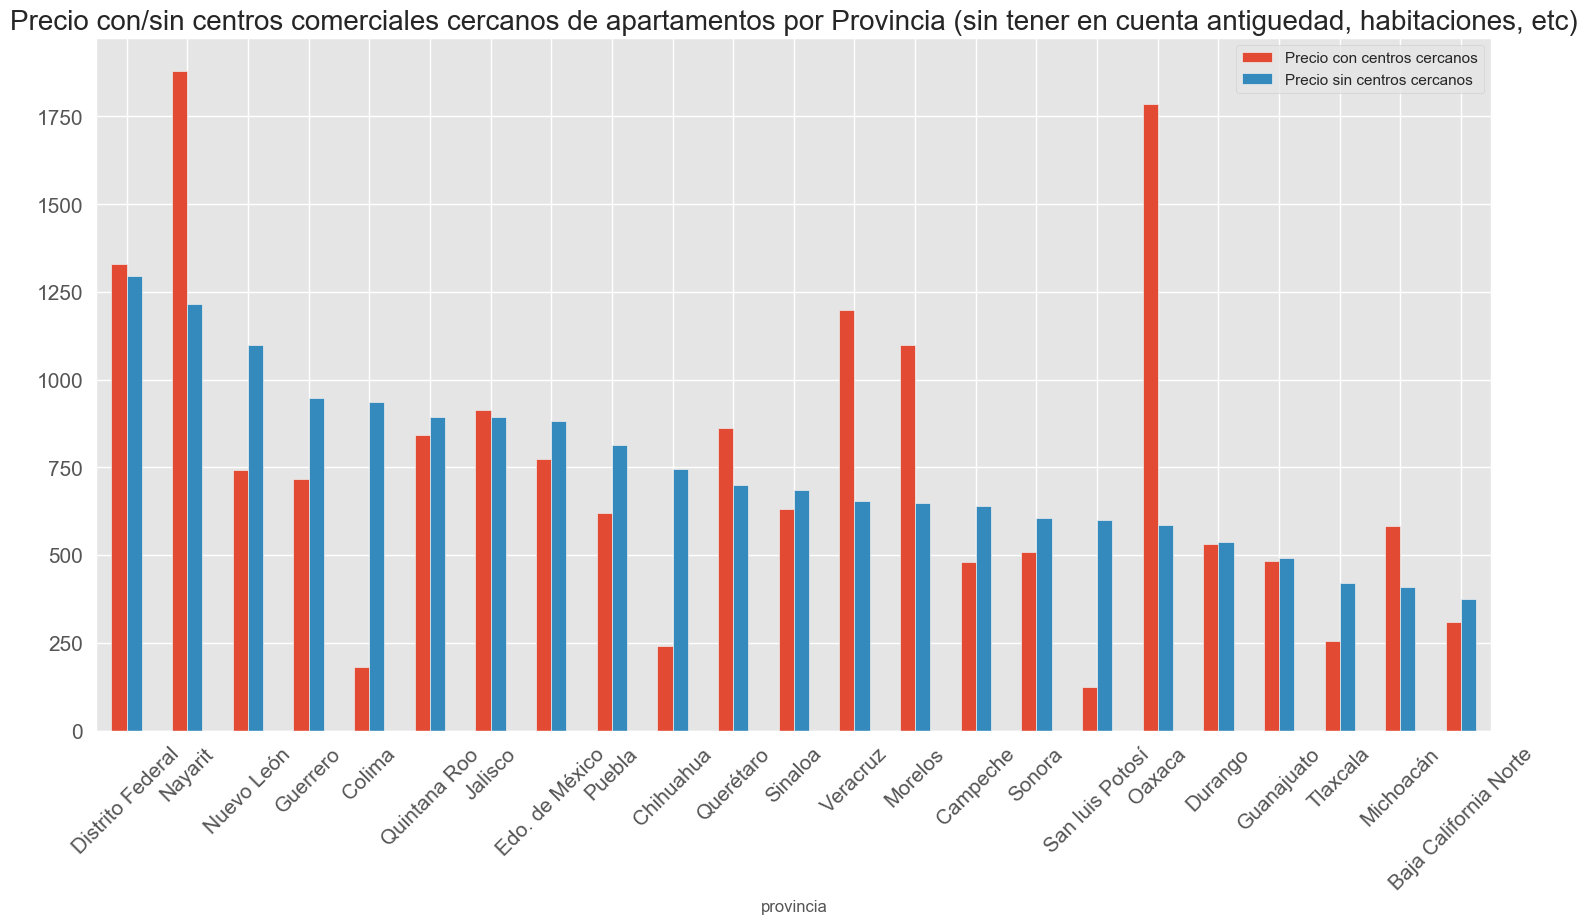

In [66]:
index = train_join_consinccc['provincia']
precio_conccc = train_join_consinccc['precio_metro_usd_prom_ccc'].values.tolist()
precio_sinccc = train_join_consinccc['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con centros cercanos': precio_conccc,
                   'Precio sin centros cercanos': precio_sinccc}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con/sin centros comerciales cercanos de apartamentos por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20)

### Vamos a tomar mas datos en cuenta para que sea mas exacto el análisis. Voy a elegir la antiguedad donde mas datos haya para el análisis.

In [71]:
train_conccc_apartamento_dfed_jua = train.loc[(train['centroscomercialescercanos'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Benito Juárez')]

train_conccc_apartamento_dfed_jua.antiguedad.value_counts()

 0.00    904
 5.00    884
20.00    572
10.00    414
 1.00    210
 4.00    208
 2.00    148
 3.00    147
30.00     61
 7.00     43
 6.00     40
50.00     37
40.00     37
 8.00     33
25.00     27
35.00     26
15.00     21
28.00     12
11.00      9
24.00      8
12.00      8
 9.00      7
45.00      6
39.00      6
26.00      5
22.00      5
13.00      5
60.00      4
23.00      4
27.00      4
32.00      4
34.00      4
47.00      3
38.00      3
46.00      3
17.00      3
37.00      3
33.00      3
43.00      2
29.00      2
31.00      2
36.00      2
67.00      2
16.00      2
18.00      2
63.00      1
49.00      1
52.00      1
54.00      1
42.00      1
48.00      1
Name: antiguedad, dtype: int64

### Tomo 0 años ya que tengo más info ahí. Ahora averiguo que parámetros de garages, habitaciones y baños me conviene tomar

In [90]:
train_conccc_apartamento_dfed_jua = train.loc[(train['centroscomercialescercanos'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Benito Juárez') & 
                                           (train['antiguedad'] == 0)]

train_conccc_apartamento_dfed_jua = train_conccc_apartamento_dfed_jua.groupby(['ciudad', 'habitaciones', 'banos', 
                                                                             'garages']).agg({'id':'count'})

train_conccc_apartamento_dfed_jua = train_conccc_apartamento_dfed_jua.rename(columns={'id':'cantidad_propiedades'})
train_conccc_apartamento_dfed_jua

cantidad_propiedades
ciudad        habitaciones banos garages                      
Benito Juárez 1.00         1.00  0.00                        3
                                 1.00                       23
                                 2.00                        2
                           2.00  0.00                        1
                                 1.00                        2
                                 2.00                        1
              2.00         1.00  0.00                        6
                                 1.00                       60
                                 2.00                        4
                           2.00  0.00                        6
                                 1.00                      238
                                 2.00                      232
                                 3.00                        6
                           3.00  2.00                        4
                                 3.00                        5
              3.00         1.00  0.00                        2
                                 1.00                        3
                                 2.00                        1
                           2.00  0.00                        1
                                 1.00                       27
                                 2.00                      157
                                 3.00                       14
                           3.00  1.00                        1
                                 2.00                       41
                                 3.00                       21
                           4.00  2.00                       14
                                 3.00                        1
              4.00         2.00  2.00                        3
                           3.00  2.00                        3
                           4.00  2.00                        1

### Según esto, por la cantidad de propiedades que hay, me conviene tomar apartamentos de 0 años para la antiguedad, 2 habitaciones, 1 garages y 2 baños.


### Hago el mismo análisis para apartamentos de 0 años de antiguedad en Distrito federal

In [77]:
# FIJO LA PROVINCIA A DISTRITO FEDERAL YA QUE TENGO MAS DATOS AHI QUE EN OTRAS PROVINCIAS

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 0) & (train['tipodepropiedad'] == 'Apartamento')]

train_conccc= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 1) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &  
                        (train['antiguedad'] == 0) &  (train['tipodepropiedad'] == 'Apartamento')]


train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_conccc = train_conccc.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_conccc = train_conccc.reset_index()
train_conccc = train_conccc[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_conccc = train_conccc.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_ccc'})

train_join_consinccc = pd.merge(train_sin_atributo, train_conccc, how = 'inner', on='ciudad')
train_join_consinccc['variacion'] = train_join_consinccc['precio_metro_usd_prom'] - train_join_consinccc['precio_metro_usd_prom_ccc']

train_join_consinccc.dropna(inplace = True)
train_join_consinccc

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_ccc,variacion
0,Miguel Hidalgo,"2,266.38","2,128.95",137.43
1,Cuauhtémoc,"2,053.04","1,612.19",440.85
2,Cuajimalpa de Morelos,"1,770.10","1,748.65",21.45
3,Benito Juárez,"1,720.29","1,570.93",149.36
4,Alvaro Obregón,"1,686.22","1,532.97",153.25
5,Coyoacán,"1,296.60","1,253.58",43.02
6,Azcapotzalco,"1,136.62","1,144.89",-8.28
7,Gustavo A. Madero,"1,038.40","1,107.59",-69.19
8,Iztacalco,906.31,856.80,49.51


In [79]:
train_join_consinccc['variacion'].mean()

101.932945

Text(0.5, 1.0, 'Precio con/sin Centros Comerciales Cercanos de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)')

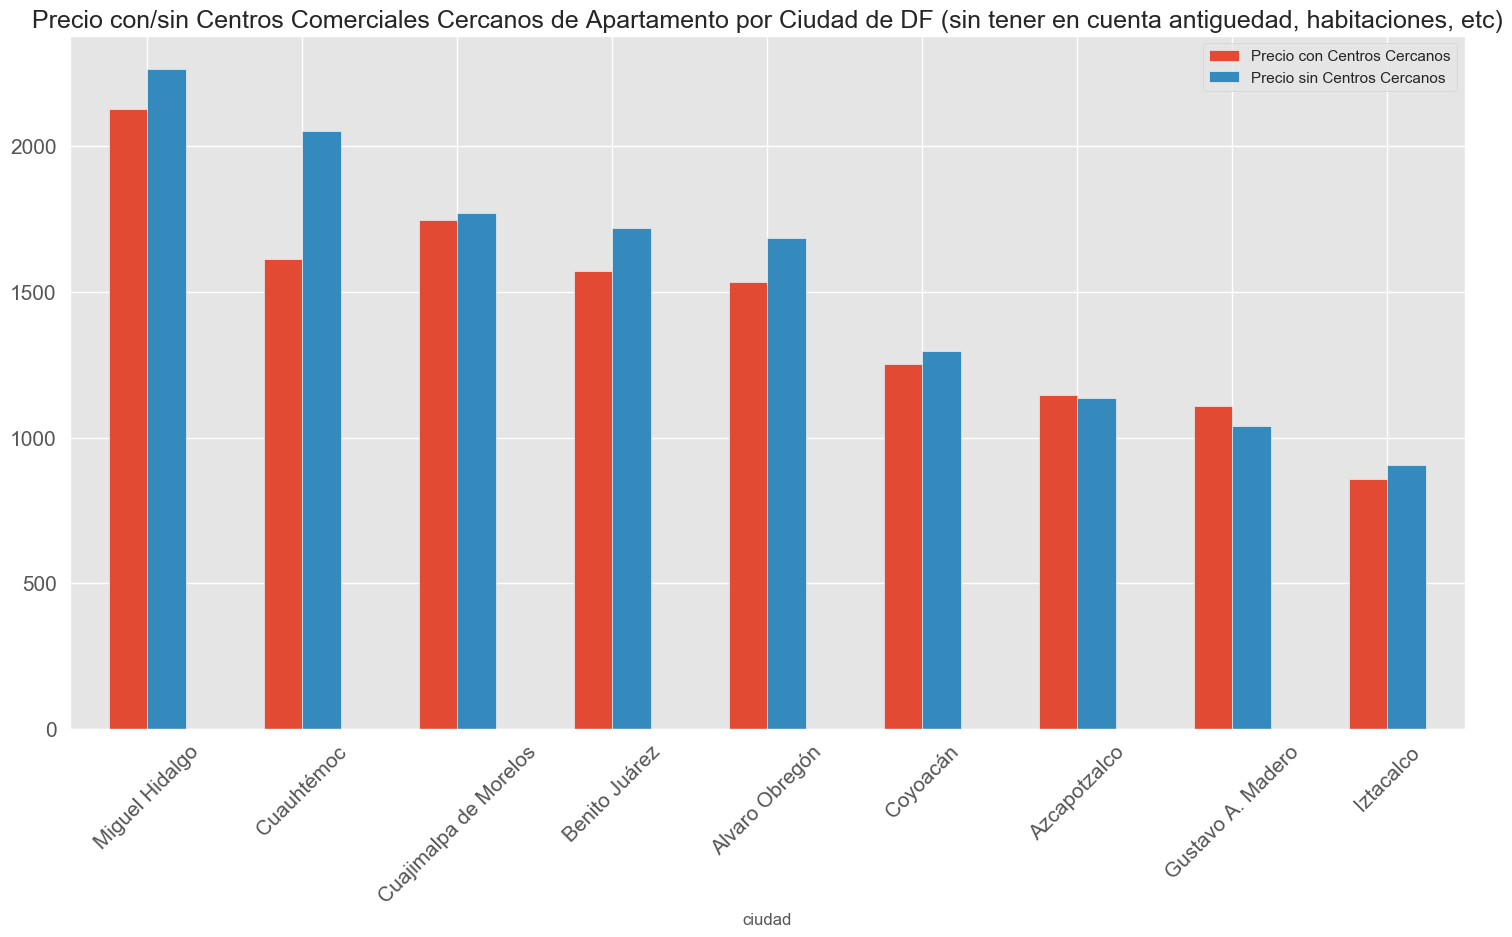

In [81]:
index = train_join_consinccc['ciudad']
precio_conccc = train_join_consinccc['precio_metro_usd_prom_ccc'].values.tolist()
precio_sinccc = train_join_consinccc['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Centros Cercanos': precio_conccc,
                   'Precio sin Centros Cercanos': precio_sinccc}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con/sin Centros Comerciales Cercanos de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 18)

### Tomo ANTIGUEDAD = 0, HABITACIONES = 2, BAÑOS = 2, GARAGES = 1 ya que poseo mas info con esos parámetros

In [93]:
train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 0) & (train['tipodepropiedad'] == 'Apartamento') &
                        (train['garages'] == 1)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_conccc= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 1) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &   (train['tipodepropiedad'] == 'Apartamento')  &
                        (train['antiguedad'] == 0) & 
                        (train['garages'] == 1)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_conccc = train_conccc.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_conccc = train_conccc.reset_index()
train_conccc = train_conccc[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_conccc = train_conccc.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_ccc'})

train_join_consinccc = pd.merge(train_sin_atributo, train_conccc, how = 'inner', on='ciudad')
train_join_consinccc['variacion'] = train_join_consinccc['precio_metro_usd_prom'] - train_join_consinccc['precio_metro_usd_prom_ccc']

train_join_consinccc.dropna(inplace = True)
train_join_consinccc

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_ccc,variacion
0,Cuauhtémoc,"2,232.59","1,852.78",379.81
1,Benito Juárez,"1,592.38","1,714.49",-122.11
2,Coyoacán,"1,386.65","1,253.58",133.08


In [92]:
train_join_consinccc['variacion'].mean()

-1024.4961

### Vemos que la variación es positiva en este caso, es decir que en promedio, termina siendo mas barato que la propiedad no tenga centros comerciales cercanos

Text(0.5, 1.0, 'Precio con/sin Centros Comerciales Cercanos de Apartamento por Ciudad de DF (con 0 años de antiguedad, 2 haitaciones, 1 garages y 2 baños)')

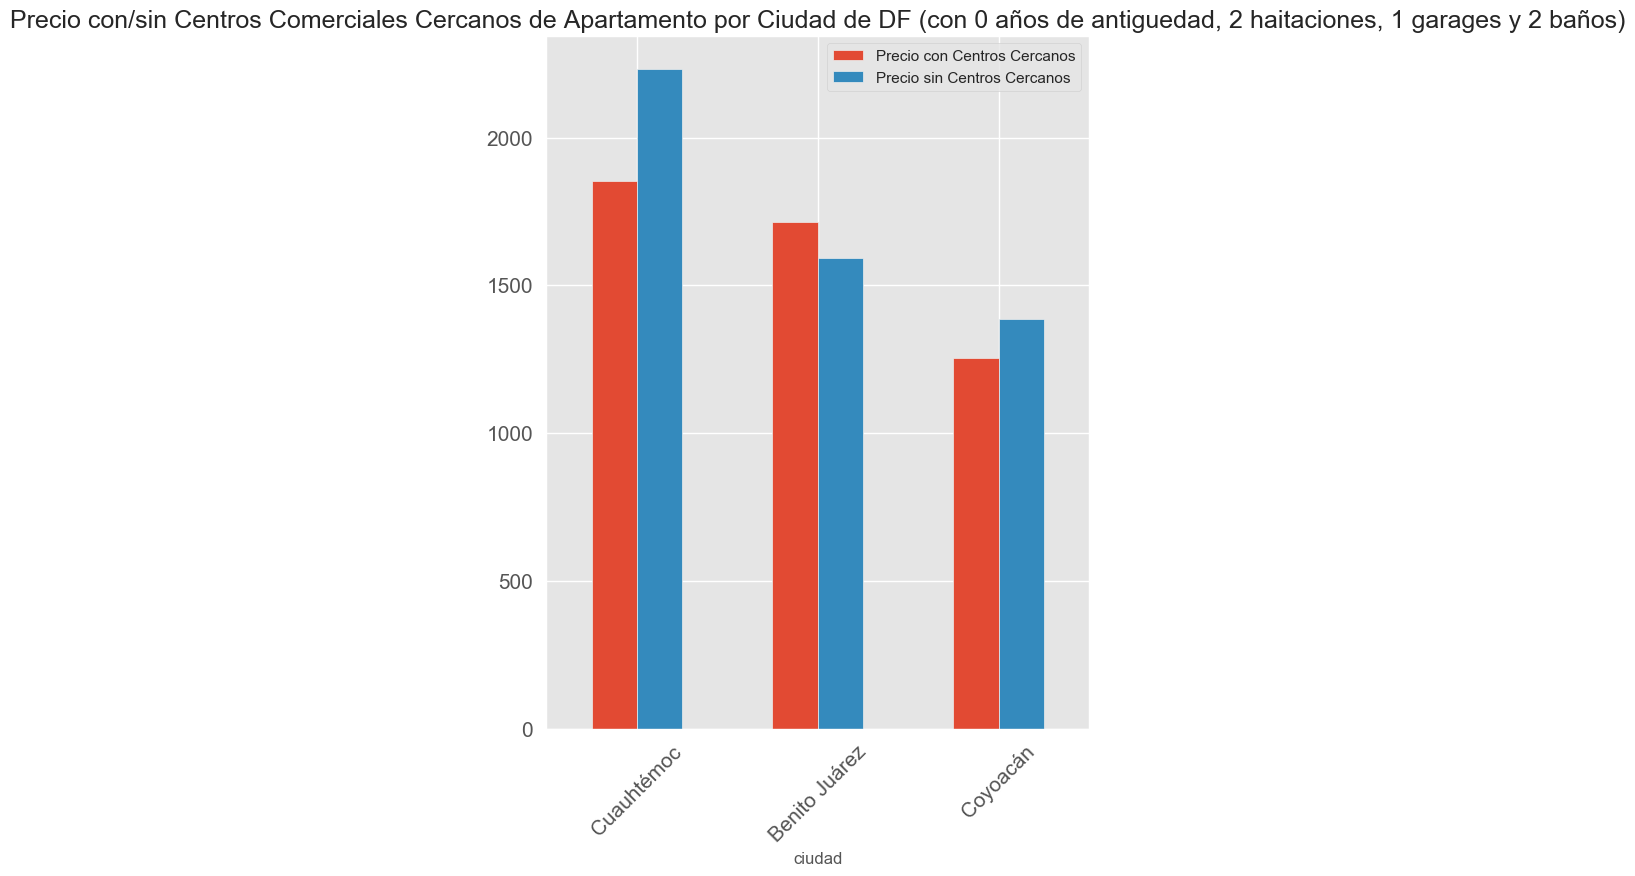

In [86]:
index = train_join_consinccc['ciudad']
precio_conccc = train_join_consinccc['precio_metro_usd_prom_ccc'].values.tolist()
precio_sinccc = train_join_consinccc['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Centros Cercanos': precio_conccc,
                   'Precio sin Centros Cercanos': precio_sinccc}, index=index)

plt.rcParams['figure.figsize'] = (7, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con/sin Centros Comerciales Cercanos de Apartamento por Ciudad de DF (con 0 años de antiguedad, 2 haitaciones, 1 garages y 2 baños)',fontsize= 18)